# Wikipedia Notable Life Expectancies
## [Notebook 10: Exploratory Data Analysis](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_EDA_thanak_2022_09_30.ipynb)
### Context

The
### Objective

The
### Data Dictionary
- **day**: Reported day of month of death
- **name**: Name of individual
- **info**: Original Wikipedia information fields for the individual from Wikipedia Notable Deaths' List page ("age, country of citizenship at birth, subsequent country of citizenship (if applicable), reason for notability, and cause of death (if known)"
- **link**: Link to the individual's page
- **num_references**: Number of references on the individual's page (a proxy for notability)
- **year**: Reported year of death
- **month**: Reported month of death
- **info_parenth**: Additional information for individual that was extracted from info because it was in parentheses
- **age**: Reported age in integer years at death*
- **cause_of_death**: Reported cause of death
- **place_1**: Country of citizenship at birth
- **place_2**: Subsequent country of citizenship (if applicable)
- **known for categories**: 0 (No) or 1 (Yes) value if individual's reported known-for role(s) is within the category. Mutliple categories are possible.† 
        - sciences
        - social
        - spiritual
        - academia_humanities
        - business_farming
        - arts
        - sports
        - law_enf_military_operator 
        - politics_govt_law
        - crime
        - event_record_other
        - other_species
- **num_categories**: Total **num_categories** for individual

    \* For age reported in a two-value estimated range, **age** reflects the arithmetic mean.  Reported estimated values of a single number reflect that number, while estimates covering a decade (e.g., 80's) were converted to the middle of the decade (i.e., 85).  The vast majority of entries for **age** reflect the single integer value that was reported.  
    
    † See Appendix A for further category definitions and decision-making regarding role categorization.

### Importing Libraries

In [1]:
# To structure code automatically
%load_ext nb_black

# To import/export sqlite databases
import sqlite3 as sql

# To save/open python objects in pickle file
# import pickle

# To help with reading, cleaning, and manipulating data
import pandas as pd
import numpy as np

# To help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# To define maximum number of columns to be displayed in a dataframe
pd.set_option("display.max_columns", None)
# To define the maximum number of rows to be displayed in a dataframe
pd.set_option("display.max_rows", 211)

# To set some dataframe visualization attributes
pd.set_option("max_colwidth", 150)

# To supress scientific notations for a dataframe
pd.set_option("display.float_format", lambda x: "%.3f" % x)

# To supress warnings
# import warnings

# warnings.filterwarnings("ignore")

# To set some plot visualization attributes
sns.set_theme()
sns.set_palette(
    (
        "midnightblue",
        "goldenrod",
        "maroon",
        "darkolivegreen",
        "cadetblue",
        "tab:purple",
        "yellowgreen",
    )
)
plt.rc("font", size=12)
plt.rc("axes", titlesize=15)
plt.rc("axes", labelsize=14)
plt.rc("xtick", labelsize=13)
plt.rc("ytick", labelsize=13)
plt.rc("legend", fontsize=13)
plt.rc("legend", fontsize=14)
plt.rc("figure", titlesize=16)

# To play auditory cue when cell has executed, has warning, or has error and set chime theme
import chime

chime.theme("zelda")

<IPython.core.display.Javascript object>

## Data Overview

### [Reading](https://github.com/teresahanak/wikipedia-life-expectancy/blob/main/wp_life_expect_clean8.db), Sampling, and Checking Data Shape

In [2]:
# Reading the dataset
conn = sql.connect("wp_life_expect_clean8.db")
data_initial = pd.read_sql("SELECT * FROM wp_life_expect_clean8", conn)

# Making a working copy
df = data_initial.copy()

# Checking the shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

# Checking first 2 rows of the data
df.head(2)

There are 98038 rows and 25 columns.


,day,name,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
0,1,William Chappell,", 86, British dancer, ballet designer and director.",https://en.wikipedia.org/wiki/William_Chappell_(dancer),21,1994,January,None,86.000,None,United Kingdom of Great Britain and Northern Ireland,None,0,0,0,0,0,1,0,0,0,0,0,0,1
1,1,Raymond Crotty,", 68, Irish economist, writer, and academic.",https://en.wikipedia.org/wiki/Raymond_Crotty,12,1994,January,None,68.000,None,Ireland,None,0,0,0,1,0,1,0,0,1,0,0,0,3


<IPython.core.display.Javascript object>

In [3]:
# Checking last 2 rows of the data
df.tail(2)

,day,name,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
98036,9,Aamir Liaquat Hussain,", 50, Pakistani journalist and politician, MNA .",https://en.wikipedia.org/wiki/Aamir_Liaquat_Hussain,99,2022,June,"2002 2007, since 2018",50.000,None,Pakistan,None,0,0,0,0,0,1,0,0,1,0,0,0,2
98037,9,Zou Jing,", 86, Chinese engineer, member of the Chinese Academy of Engineering.",https://en.wikipedia.org/wiki/Zou_Jing_(engineer),3,2022,June,None,86.000,None,"China, People's Republic of",None,1,0,0,0,0,0,0,0,0,0,0,0,1


<IPython.core.display.Javascript object>

In [4]:
# Checking a sample of the data
df.sample(5)

,day,name,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,other_species,num_categories
10101,10,Robert Kramer,", 60, American film director, screenwriter and actor, meningitis.",https://en.wikipedia.org/wiki/Robert_Kramer,21,1999,November,None,60.000,meningitis,United States of America,None,0,0,0,0,0,1,0,0,0,0,0,0,1
58842,25,Farrakh Khan,", 77, Pakistani army general, Chief of General Staff .",https://en.wikipedia.org/wiki/Farrakh_Khan,11,2016,June,1991 1994,77.000,None,Pakistan,None,0,0,0,0,0,0,0,1,0,0,0,0,1
21534,10,Wulff-Dieter Heintz,", 76, German astronomer at Swarthmore College.",https://en.wikipedia.org/wiki/Wulff-Dieter_Heintz,4,2006,June,None,76.000,None,Germany,None,1,0,0,0,0,0,0,0,0,0,0,0,1
50776,22,Don Grate,", 91, American baseball .",https://en.wikipedia.org/wiki/Don_Grate,5,2014,November,Philadelphia Phillies and basketball player Sheboygan Red Skins,91.000,None,United States of America,None,0,0,0,0,0,0,1,0,0,0,0,0,1
15499,17,Derek Bell,", 66, Northern Irish harpist, pianist, oboist, musicologist and composer , cardiac arrest.",https://en.wikipedia.org/wiki/Derek_Bell_(musician),5,2002,October,The Chieftains,66.000,cardiac arrest,United Kingdom of Great Britain and Northern Ireland,None,0,0,0,1,0,1,0,0,0,0,0,0,2


<IPython.core.display.Javascript object>

### Checking data types, duplicates, and null values

In [5]:
# Checking data types and null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 98038 entries, 0 to 98037
Data columns (total 25 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   day                        98038 non-null  object 
 1   name                       98038 non-null  object 
 2   info                       98038 non-null  object 
 3   link                       98038 non-null  object 
 4   num_references             98038 non-null  int64  
 5   year                       98038 non-null  int64  
 6   month                      98038 non-null  object 
 7   info_parenth               36659 non-null  object 
 8   age                        98038 non-null  float64
 9   cause_of_death             33490 non-null  object 
 10  place_1                    97883 non-null  object 
 11  place_2                    5897 non-null   object 
 12  sciences                   98038 non-null  int64  
 13  social                     98038 non-null  int

<IPython.core.display.Javascript object>

In [6]:
# Checking duplicate rows
df.duplicated().sum()

0

<IPython.core.display.Javascript object>

In [7]:
# Checking for duplicate links
df["link"].duplicated().sum()

0

<IPython.core.display.Javascript object>

In [8]:
# Checking sum of null values by column
df.isnull().sum()

day                              0
name                             0
info                             0
link                             0
num_references                   0
year                             0
month                            0
info_parenth                 61379
age                              0
cause_of_death               64548
place_1                        155
place_2                      92141
sciences                         0
social                           0
spiritual                        0
academia_humanities              0
business_farming                 0
arts                             0
sports                           0
law_enf_military_operator        0
politics_govt_law                0
crime                            0
event_record_other               0
other_species                    0
num_categories                   0
dtype: int64

<IPython.core.display.Javascript object>

In [9]:
# Check percentage of null values by column
df.isnull().sum() / len(df) * 100

day                          0.000
name                         0.000
info                         0.000
link                         0.000
num_references               0.000
year                         0.000
month                        0.000
info_parenth                62.607
age                          0.000
cause_of_death              65.840
place_1                      0.158
place_2                     93.985
sciences                     0.000
social                       0.000
spiritual                    0.000
academia_humanities          0.000
business_farming             0.000
arts                         0.000
sports                       0.000
law_enf_military_operator    0.000
politics_govt_law            0.000
crime                        0.000
event_record_other           0.000
other_species                0.000
num_categories               0.000
dtype: float64

<IPython.core.display.Javascript object>

In [10]:
# Checking number of missing values per row
df.isnull().sum(axis=1).value_counts()

2    42980
3    38771
1    15606
0      595
4       86
dtype: int64

<IPython.core.display.Javascript object>

#### Observations:
- We have 98,038 rows and 25 columns.
- Our target, `age` has no missing values.  
- As expected, `info_parenth` and `place_2` both have high percentages of missing values.  `cause_of death` also has a very high proportion of missing values, which is not problematic for the current analysis.
- There are 153 missing values (~1.6%) for `place_1`, the handling of which we will need to consider.
- The value counts for missing values per row looks generally consistent with the expected missing values, with the `place_1` missing values being the only concern.
- Since we do not have a date of birth feature, we are not working with age calculated to the day, so we can drop `day`.
- There are no duplicate `link` values in the current dataset, so we can drop the purely nominal `name` column as we are retaining `link`, which we may need for referencing specific entries.
- `num_references`, `age`, and `num_categories` are all of the appopriate numeric type, either integer or float.
- `year` is of integer type, which we will keep for any temporal analysis.
- `month` may be interesting for EDA, but is not anticipated to be useful as a predictor as we do not have date of birth.  We will retain it for now and typecast it from object to category.
- `info`, `link`, `info_parenth`, and `cause_of_death` will be left as object type.  `cause_of_death` is not a focus of this analysis, but this column could be further treated to create broader categories of causes (e.g., grouping all types of cancer) for further analysis.  For now, we will retain it, as we might probe it somewhat during EDA.  `info` and `info_parenth` we will retain for reference only.
- `place_1` and `place_2` are of object type and we will convert them to category.  After initial EDA, we will extract a new feature, `region`, to reduce dimensionality of the `place_` information.
- The `known for` categories are all of integer type, but are boolean in nature.  For their summary statistics, we will typecast them as category, then convert them back to integer.
- For this analysis, we are interested only in human entries, so we will proceed to drop non-human entries, as well as the entire `other_species` column, which will contain only zeros for the human entries.

#### Dropping `day` and `name`

In [11]:
# Dropping day and name columns
df.drop(["day", "name"], axis=1, inplace=True)

<IPython.core.display.Javascript object>

#### Excluding Entries for `other_species`

In [12]:
# Re-assigning df to include only human entries
df = df[df["other_species"] == 0]

# Dropping other_species column as no longer needed
df.drop("other_species", axis=1, inplace=True)

# Checking new shape
print(f"There are {df.shape[0]} rows and {df.shape[1]} columns.")

There are 97549 rows and 22 columns.


<IPython.core.display.Javascript object>

#### Typecasting `month`, `place_1`,  `place_2`, and `known for` Categories as Category

In [13]:
# Typecasting place_1 and place_2 as category
df[
    [
        "month",
        "place_1",
        "place_2",
        "sciences",
        "social",
        "spiritual",
        "academia_humanities",
        "business_farming",
        "arts",
        "sports",
        "law_enf_military_operator",
        "politics_govt_law",
        "crime",
        "event_record_other",
    ]
] = df[
    [
        "month",
        "place_1",
        "place_2",
        "sciences",
        "social",
        "spiritual",
        "academia_humanities",
        "business_farming",
        "arts",
        "sports",
        "law_enf_military_operator",
        "politics_govt_law",
        "crime",
        "event_record_other",
    ]
].astype(
    "category"
)

<IPython.core.display.Javascript object>

#### Confirming Updated Data Types and Number of Columns

In [14]:
# Confirming data types and number of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97549 entries, 0 to 98037
Data columns (total 22 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   info                       97549 non-null  object  
 1   link                       97549 non-null  object  
 2   num_references             97549 non-null  int64   
 3   year                       97549 non-null  int64   
 4   month                      97549 non-null  category
 5   info_parenth               36536 non-null  object  
 6   age                        97549 non-null  float64 
 7   cause_of_death             33179 non-null  object  
 8   place_1                    97406 non-null  category
 9   place_2                    5843 non-null   category
 10  sciences                   97549 non-null  category
 11  social                     97549 non-null  category
 12  spiritual                  97549 non-null  category
 13  academia_humanities        9754

<IPython.core.display.Javascript object>

#### Observations:
- With 97,549 human entries and 22 remaining columns, we are read to proceed with EDA.

## Exploratory Data Analysis (EDA)

### Summary Statistics of Numerical Features

In [15]:
# Summary statistics of numerica features
df.describe().T

,count,mean,std,min,25%,50%,75%,max
num_references,97549.000,12.671,21.391,3.000,4.000,7.000,13.000,660.000
year,97549.000,2012.143,7.828,1994.000,2007.000,2014.000,2019.000,2022.000
age,97549.000,76.766,16.088,0.250,69.000,80.000,88.000,134.000
num_categories,97549.000,1.159,0.400,1.000,1.000,1.000,1.000,5.000


<IPython.core.display.Javascript object>

#### Observations:
- Our target, `age`, has a left-skewed distribution with a wide spread, from 3 months to 134 years.  Despite the upper-end outlier, the mean and median are close, at ~76 and 80 years, respectively.
- `num_references` has a wide spread and is highly right skewed, with a mean of ~13 and median of 7.  75% of entries have 13 or fewer references.
- We see the range of `year` correctly reflects the data that was collected, from 1994 to 2022.
- `num_categories` ranges from 1 to 5, with at least 75% of entries having a single `known for` category.

### Summary Statistics of Categorical and Boolean-like Features

In [16]:
# Summary statistics of non-numerical features
df.describe(include=["object", "category"]).T

,count,unique,top,freq
info,97549,89447,", 87, American baseball player .",41
link,97549,97549,https://en.wikipedia.org/wiki/William_Chappell_(dancer),1
month,97549,12,January,9868
info_parenth,36536,16946,", ,",3120
cause_of_death,33179,3163,cancer,4220
place_1,97406,211,United States of America,34843
place_2,5843,155,United States of America,2317
sciences,97549,2,0,88794
social,97549,2,0,96696
spiritual,97549,2,0,94101


<IPython.core.display.Javascript object>

In [17]:
# Checking different levels of place_1 and place_2
cat_cols = ["place_1", "place_2"]
for column in cat_cols:
    print(f"Unique values in {column} are: \n")
    print(df[column].value_counts(), "\n", "-" * 60, "\n")

Unique values in place_1 are: 

United States of America                                34843
United Kingdom of Great Britain and Northern Ireland    12186
India                                                    3857
Canada                                                   3572
Australia                                                2930
France                                                   2420
Germany                                                  2390
Italy                                                    1858
Russia                                                   1406
New Zealand                                              1243
Ireland                                                  1180
Japan                                                    1165
China, People's Republic of                              1135
Scotland                                                 1093
Spain                                                    1043
Norway                                

<IPython.core.display.Javascript object>

#### Observations
- `info` stands out as having a value consistent for 41 entries--American baseball player, living to age 87.  This feature is retained only for reference, as untreated it is unwieldy, but the example does provide validation to the entries having identifiable similarities and differences, on which to base analysis.
- `link` is again confirmed here as having all unique values.
- We see that there are 12 unique values for `month`, as expected.  January is the top value, accounting for ~10% of entries.
- `cause_of_death` has 3160 unique values, in its current form, with ~4220 entries for the top value of unspecified cancer.
- There are 211 unique values for `place_1` and 155 for `place_2`, with United States of America being the most frequent for both and we can see the unique places with their respective counts listed.
- `arts` leads the `known for` categories, followed by `politics_govt_law`, then `sports`.  All categories have 2 values, as expected.

In [18]:
# Converting known for categories back to integer
df[
    [
        "sciences",
        "social",
        "spiritual",
        "academia_humanities",
        "business_farming",
        "arts",
        "sports",
        "law_enf_military_operator",
        "politics_govt_law",
        "crime",
        "event_record_other",
    ]
] = df[
    [
        "sciences",
        "social",
        "spiritual",
        "academia_humanities",
        "business_farming",
        "arts",
        "sports",
        "law_enf_military_operator",
        "politics_govt_law",
        "crime",
        "event_record_other",
    ]
].astype(
    "int64"
)

<IPython.core.display.Javascript object>

### Univariate Analysis

#### Function to plot histogram and boxplot on same scale

In [19]:
# Define a function to create a boxplot and histplot for numeric variables
def hist_box(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined
    
    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12, 7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f1, (ax_box1, ax_hist1) = plt.subplots(  # Assigning the figure and the 2 axes
        nrows=2,  # Subplot grid has 2 rows
        sharex=True,  # Subplots share the same x axis
        gridspec_kw={
            "height_ratios": (0.25, 0.75)
        },  # Proportional height of the subplots
        figsize=figsize,
    )  # Assigning the figure size

    # Creating the boxplot and showing mean with some mean and median attributes
    sns.boxplot(
        data=data,
        x=feature,
        ax=ax_box1,
        showmeans=True,
        color="mediumorchid",
        medianprops={"color": "black"},
        meanprops={
            "marker": "D",
            "markersize": 4,
            "markeredgecolor": "black",
            "markerfacecolor": "black",
        },
    )

    # Creating the histplot
    sns.histplot(
        data=data, x=feature, ax=ax_hist1, kde=kde, bins=bins, color="darkolivegreen"
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist1, color="darkolivegreen"
    )

    # Draw vertical line at mean on histogram
    ax_hist1.axvline(data[feature].mean(), linestyle="--", linewidth=2, color="black")

    # Draw vertical line at median on histogram
    ax_hist1.axvline(data[feature].median(), linewidth=2, color="black")

<IPython.core.display.Javascript object>

### Univariate Analysis -- Numerical Features

### `age` (target)

Skewness: -1.117894606370505


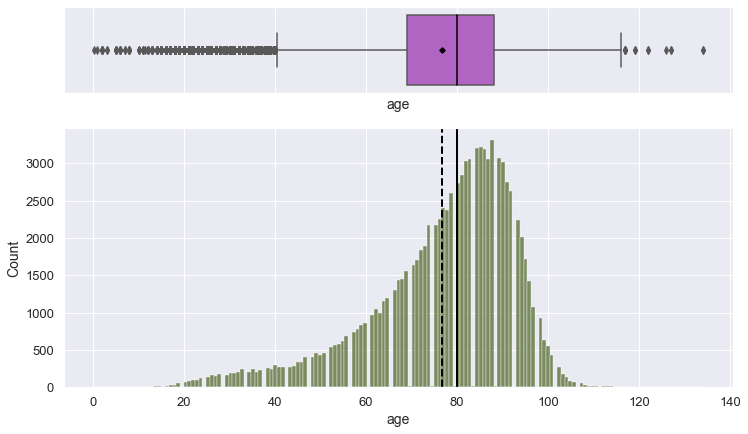

<IPython.core.display.Javascript object>

In [20]:
# Plotting histogram and boxplot of age with skewness displayed
hist_box(df, "age")
print(f'Skewness: {df["age"].skew()}')

#### Observations:
- `age` has a highly left skewed distribution with outliers at both ends, with at least one value over 130 years.
- Mean and median are ~76 and 80 respectively.
- As we are focused on pro-active lives lived, rather than passive event, records, or exceptions, we will look again at our target's distribution excluding entries that have `event_record_other` as their sole `known for` category.

#### `age` without Entries with `event_record_other` as Sole Category

There are 457 entries with event_record_other as sole category.

Skewness: -1.097491570738992


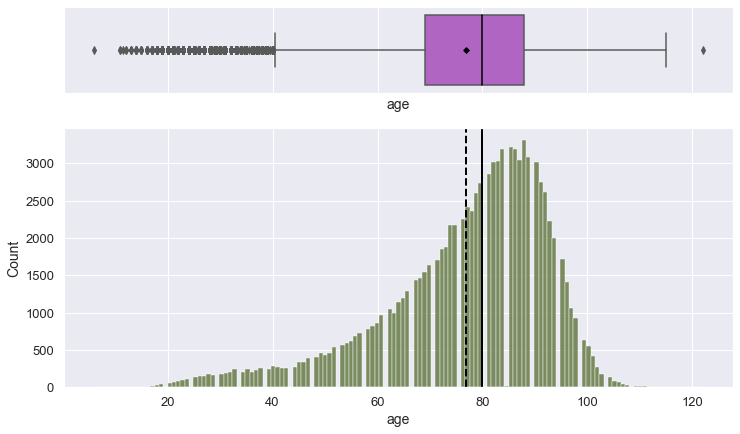

<IPython.core.display.Javascript object>

In [21]:
# Plotting histogram and boxplot of age with skewness displayed
hist_box(df[~((df["event_record_other"] == 1) & (df["num_categories"] == 1))], "age")
print(
    f'There are {len(df[(df["event_record_other"] == 1) & (df["num_categories"] == 1)])} entries with event_record_other as sole category.\n'
)
print(
    f'Skewness: {df[~((df["event_record_other"] == 1) & (df["num_categories"] == 1))]["age"].skew()}'
)

#### Observations:
- Mean and median are similar for the distribution excluding entries with `event_record_other` as their sole `known_for` category.
- The distribution is still highly left skewed, but slightly less and with a narrower spread, and fewer outliers.
- There are possibly two modes--the obvious peak at ~87 years and another possibility at ~40, so we may have two Gaussian's combined here.
- We will drop the entries with `event_record_other` after EDA.

### `num_references`

Skewness: 9.175015326876549


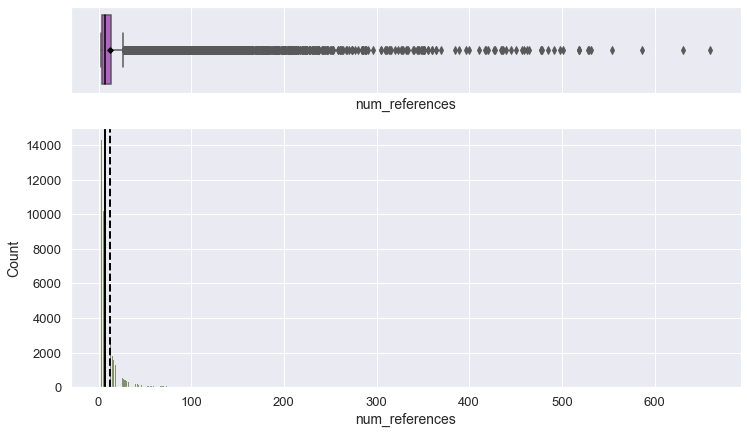

<IPython.core.display.Javascript object>

In [22]:
# Plotting histogram and boxplot of num_references with skewness displayed
hist_box(df, "num_references")
print(f'Skewness: {df["num_references"].skew()}')

#### Observations:
- `num_references` has a very highly right skewed distribution, with upper-end outliers with over 600 references.
- We will look more closely at a log transformation of this feature.

#### `log_num_references`

Skewness: 1.0053021939038487


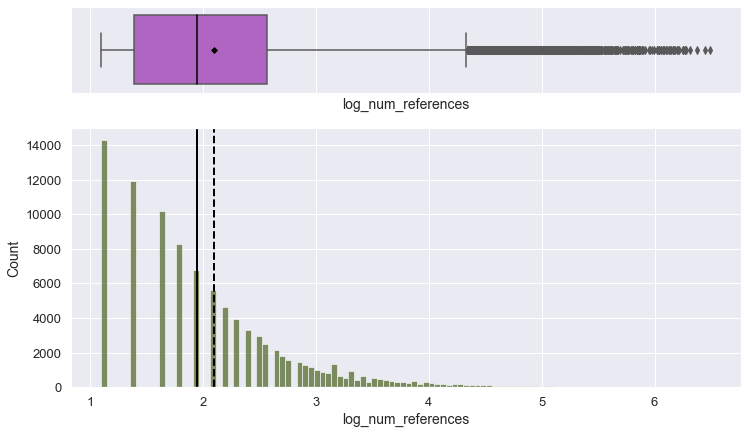

<IPython.core.display.Javascript object>

In [23]:
# Creating log_num_references (minimum num_references is 2 for this dataset so no need to add 1 to x)
df["log_num_references"] = df["num_references"].apply(lambda x: np.log(x))

# Plotting histogram and boxplot of num_references with skewness displayed
hist_box(df, "log_num_references")
print(f'Skewness: {df["log_num_references"].skew()}')

#### Observations:
- `log_num_references` is also highly right skewed, albeit less than the original `num_references` feature.
- Let us try a reciprocal transformation of `num_references` (i.e., 1/`num_references`).

#### `recip_num_references`

Skewness: 0.45717432732671515


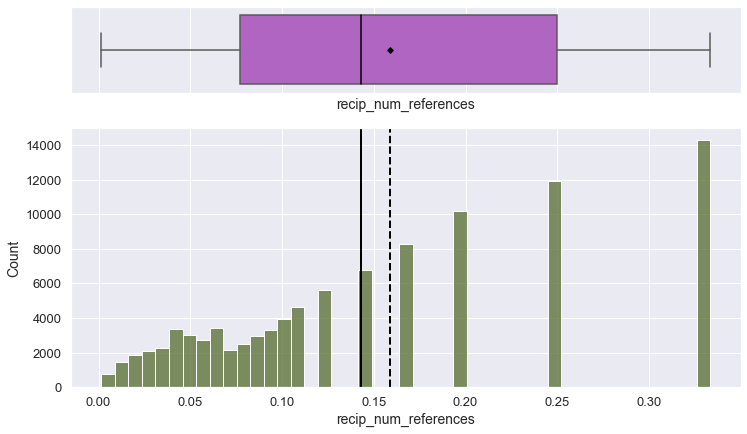

<IPython.core.display.Javascript object>

In [24]:
# Creating recip_num_references = 1/num_references
df["recip_num_references"] = df["num_references"].apply(lambda x: 1 / x)

# Plotting histogram and boxplot of num_references with skewness displayed
hist_box(df, "recip_num_references")
print(f'Skewness: {df["recip_num_references"].skew()}')

#### Observations:
- The reciprocal transformation was more effective in decreasing the skewness of the distribution.
- There are two to three modes.
- We will proceed with `recip_num_references` for now and drop `log_num_references`.

#### Dropping `log_num_references`

In [25]:
# Dropping log_num_references
df.drop("log_num_references", axis=1, inplace=True)
df.reset_index(inplace=True, drop=True)

<IPython.core.display.Javascript object>

### `year`

Skewness: -0.7569443787993042


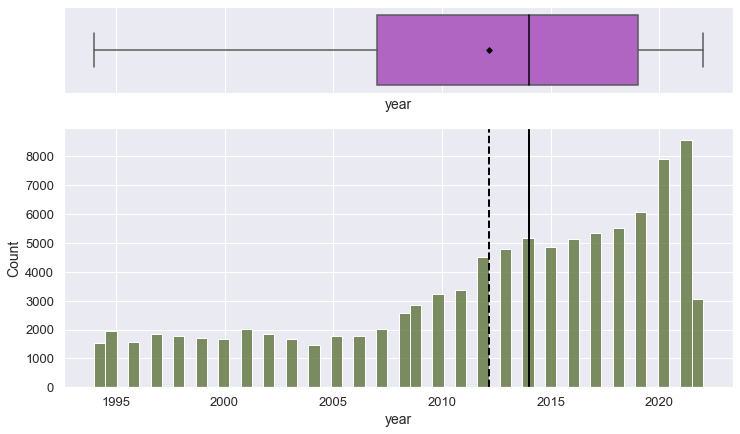

<IPython.core.display.Javascript object>

In [26]:
# Plotting histogram and boxplot of year with skewness displayed
hist_box(df, "year")
print(f'Skewness: {df["year"].skew()}')

#### Observations:
- The distribution for `year` is moderately left skewed, with no outliers.
- The number of entries is quite level from 1994 through 2007, then begins an upward trend.
- The low count for 2022 reflects that just under the first half of the year is represented in the dataset.
- 2014, the median, splits the dataset in half, which makes sense as we would expect reporting to have increased with increased use of the Internet as well as population increase.  The consistency of the earlier years is interesting.

### Univariate Analysis -- Categorical Features

#### Function for Labeled Countplots

In [27]:
# Define a function to create labeled countplots
def labeled_countplot(
    data, feature, perc=False, rotation=90, height=6, n=None, order=None
):
    """
    Countplot with count or percentage at top
    
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None--displays all levels)
    order: order to display levels (default is None)
    rotation: xtick rotation (default is 90)
    height: figure height (default is 6)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()  # Number of columns
    if n is None:
        plt.figure(
            figsize=(count + 1, height)
        )  # Sets figure width according to total number of categories
    else:
        plt.figure(figsize=(n + 1, height))

    plt.xticks(rotation=rotation, fontsize=15)  # X-tick label rotation and size

    ax = sns.countplot(  # Create the axes as countplot
        data=data, x=feature, palette="Accent_r", order=order
    )

    for p in ax.patches:  # For loop to label each bar (each bar is a p in patches)
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # Assign label as category percentage of total
        else:
            label = p.get_height()  # Assign label as category count

        x = p.get_x() + p.get_width() / 2  # Find center of the bar in x direction
        y = p.get_height()  # Find top of the bar

        ax.annotate(  # Annotate the bar with label
            label,
            (x, y),  # The location on the plot being annotated
            ha="center",  # Centers label text horizontally about its given coordinates
            va="center",  # Centers label text vertically about its given coordinates
            size=14,  # Font size
            xytext=(0, 5),  # The label coordinates
            textcoords="offset points",
        )  # Offsets to label coordinates with origin at (x,y)

<IPython.core.display.Javascript object>

### `year`

Unique values: 29


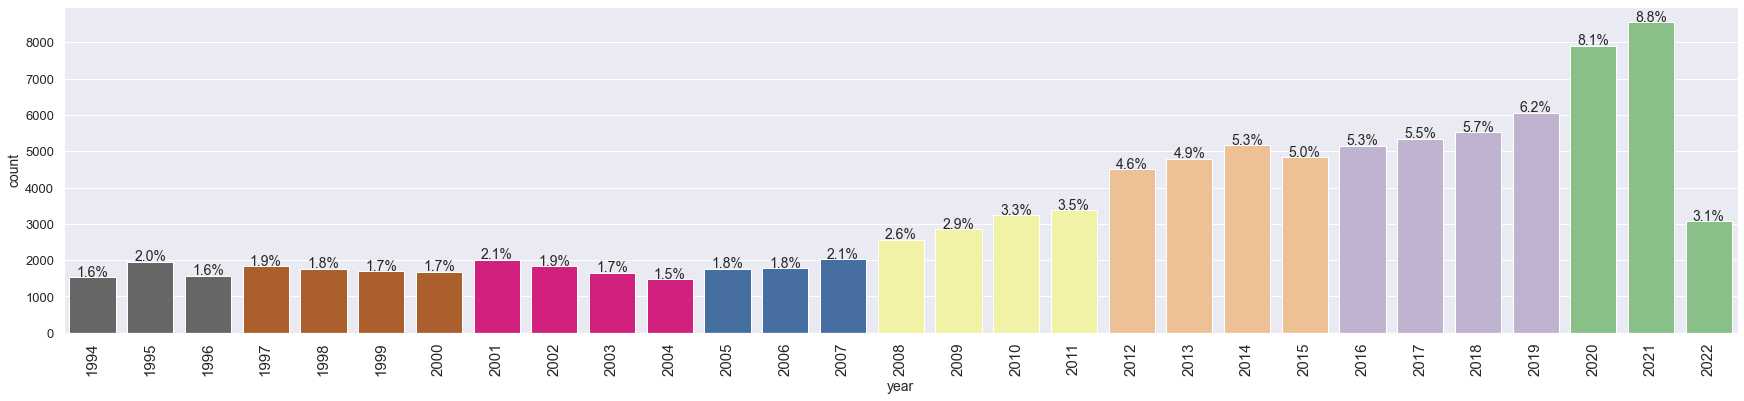

<IPython.core.display.Javascript object>

In [28]:
# Countplot and number of unique values for year
print(f"Unique values: {df['year'].nunique()}")
labeled_countplot(df, "year", perc=True)

#### Observations:
- Here, we take another look at the temporal feature `year`, presented as a categorical feature.

### `month`

Unique values: 12


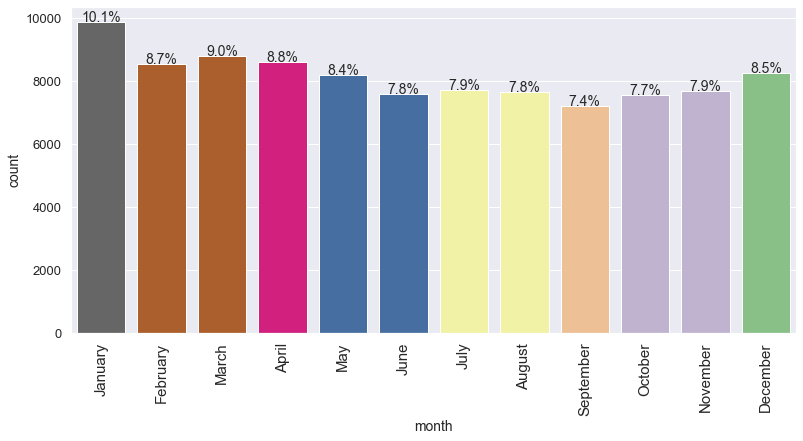

<IPython.core.display.Javascript object>

In [29]:
# Countplot and number of unique values for month
print(f"Unique values: {df['month'].nunique()}")
labeled_countplot(
    df,
    "month",
    perc=True,
    order=[
        "January",
        "February",
        "March",
        "April",
        "May",
        "June",
        "July",
        "August",
        "September",
        "October",
        "November",
        "December",
    ],
)

#### Observations:
- More notable deaths are reported in January, at 10.1%, than in any other month.
- There is a decrease in notable deaths during the northern hemisphere's warmer months, which is consistent with what we expect for the dataset, which is dominated by entries from the northern hemisphere.
- September has the fewest notable deaths reported, at 7.4%.

### `place_1`

Unique values: 211


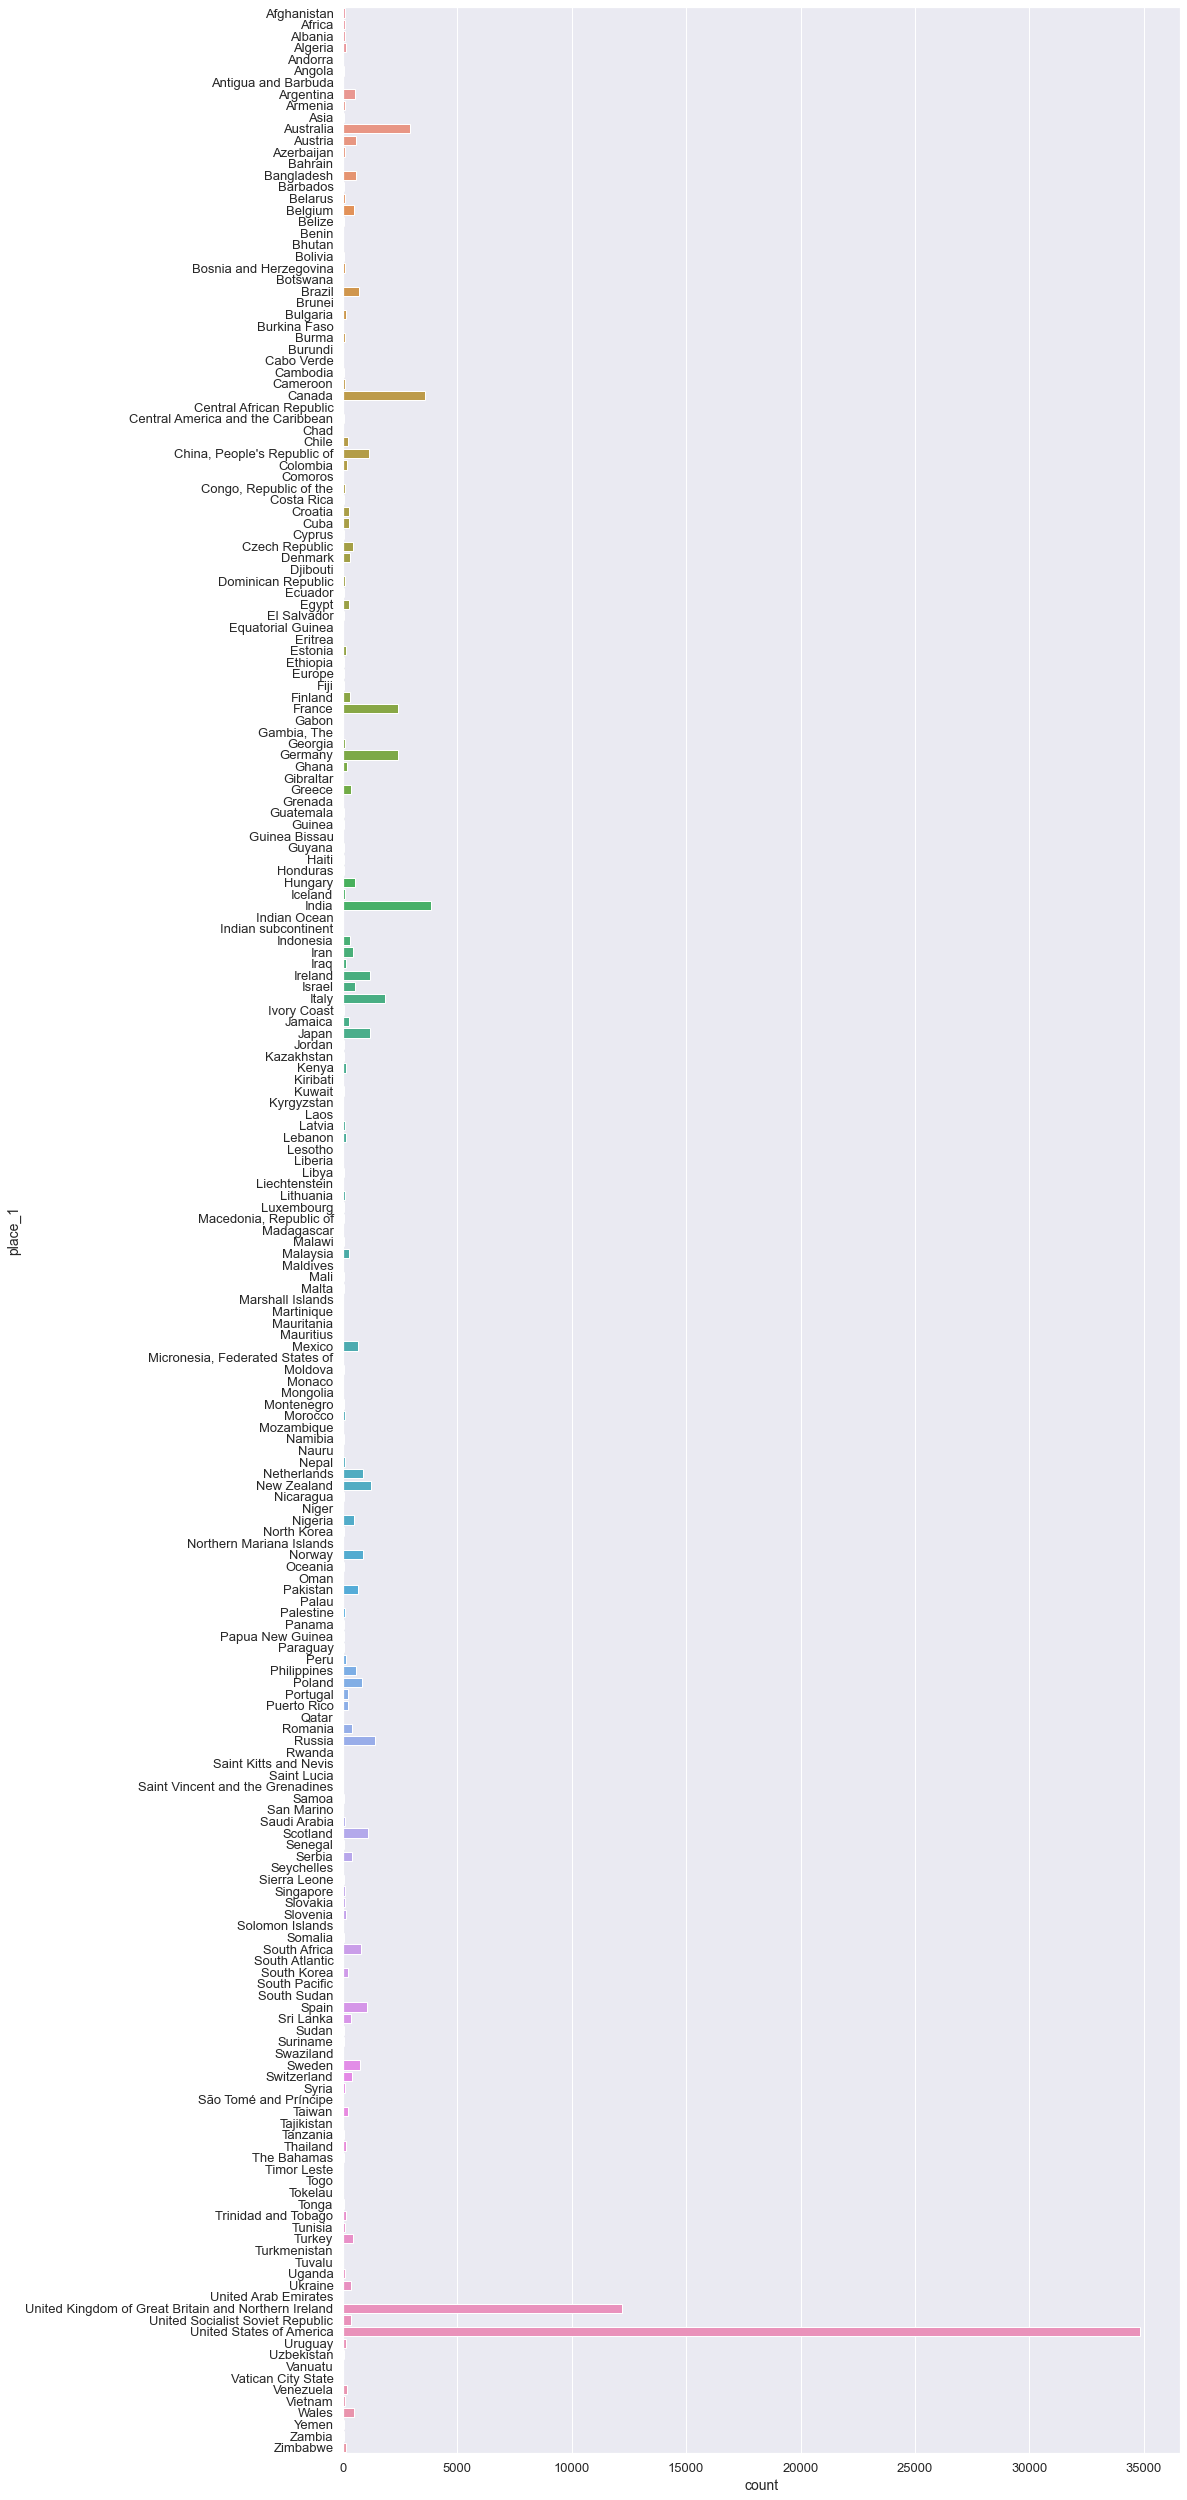

<IPython.core.display.Javascript object>

In [30]:
# Countplot and number of unique values for place_1
print(f"Unique values: {df['place_1'].nunique()}")
plt.figure(figsize=(15, 45))
sns.countplot(data=df, y="place_1")
plt.show()

#### Observations:
- Over 1/3 of entries are from the United States of America, with the United Kingdom having the second highest count at ~12,000.
- Let us take a closer look at the top 10 `place_1` countries.

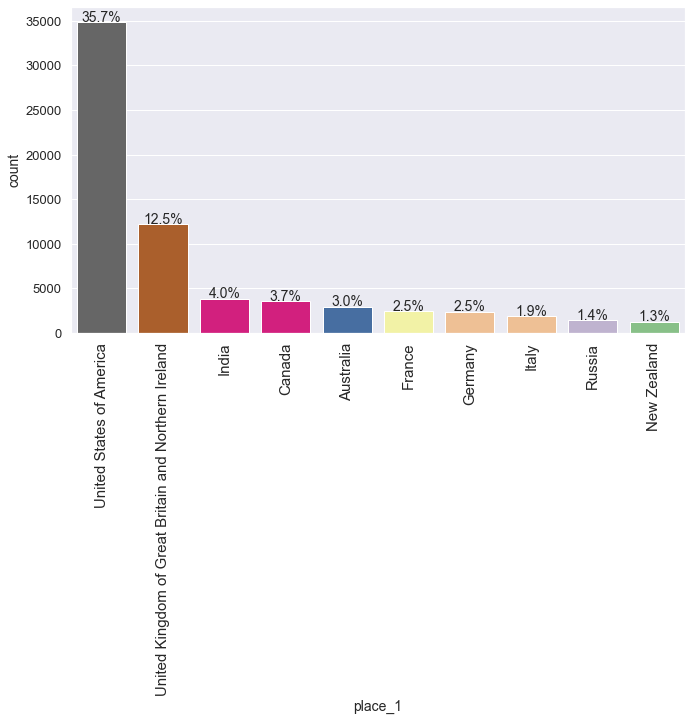

<IPython.core.display.Javascript object>

In [31]:
# Countplot for top 10 place_1 countries
n = 10
order = df["place_1"].value_counts().index[:n]
labeled_countplot(df, "place_1", perc=True, n=n, order=order)

#### Observations:
- India, Canada, Australia, France, Germany, Italy, Russia, and New Zealand make up the rest of the top 10 `place_1` countries.
- The top 10 values account for ~68% of entries.

### `place_2`

Unique values: 155


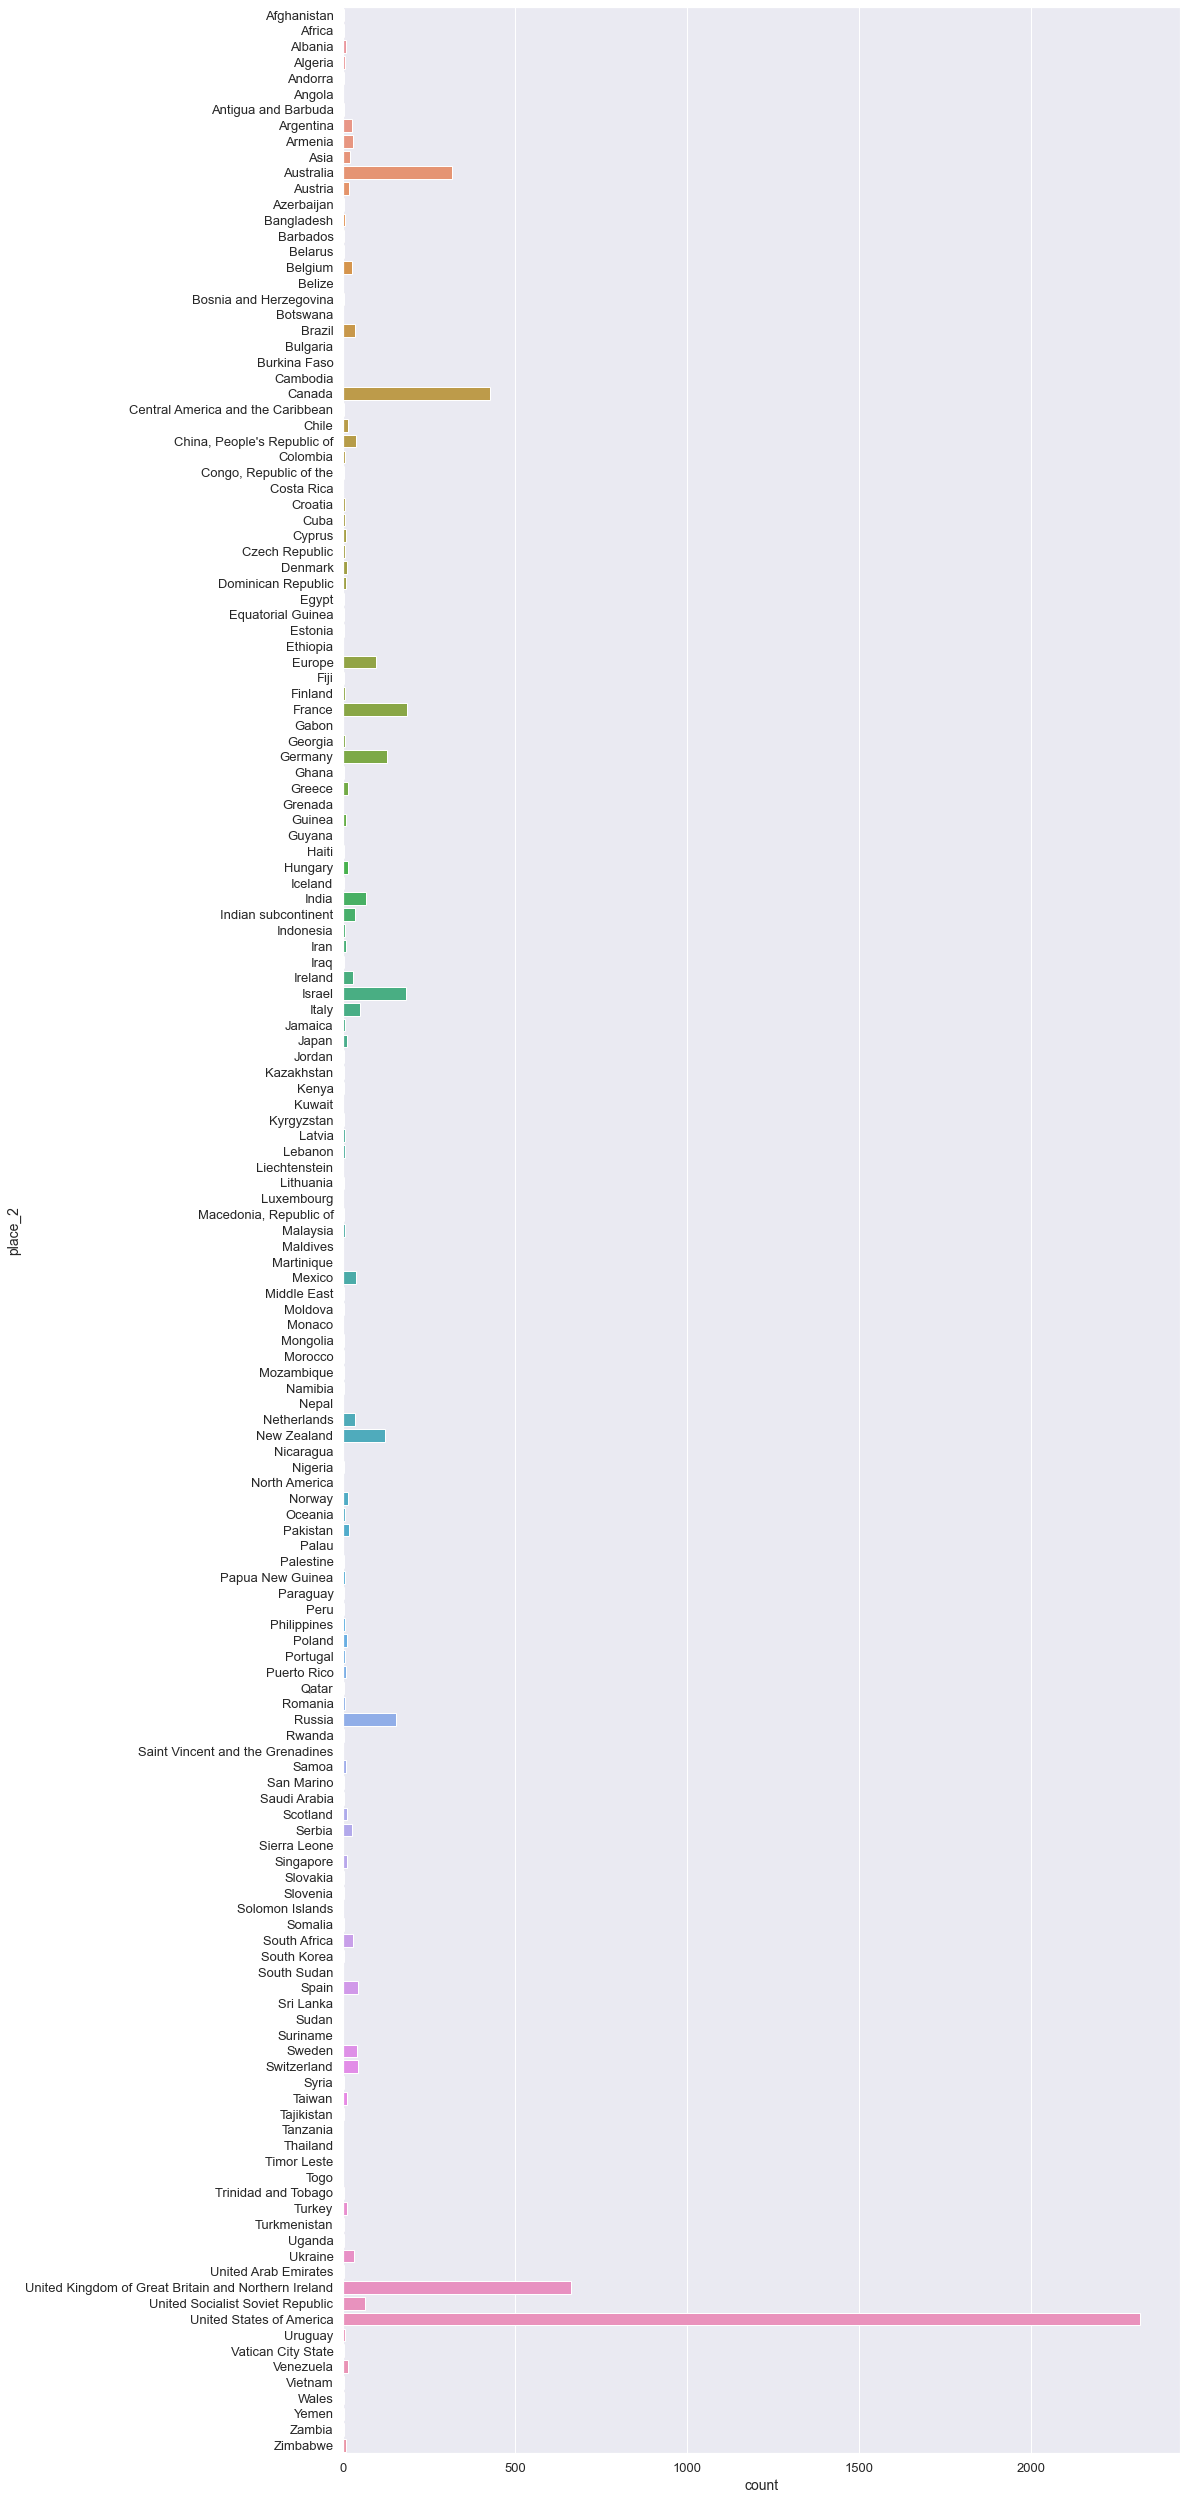

<IPython.core.display.Javascript object>

In [32]:
# Countplot and number of unique values for place_2
print(f"Unique values: {df['place_2'].nunique()}")
plt.figure(figsize=(15, 45))
sns.countplot(data=df, y="place_2")
plt.show()

#### Observations:
- The United States of America also accounts for the highest number of `place_2` values, at ~2300.
- Italy is second, followed by the United Kingdom.
- Let us take a closer look at the top 10 `place_2` countries.

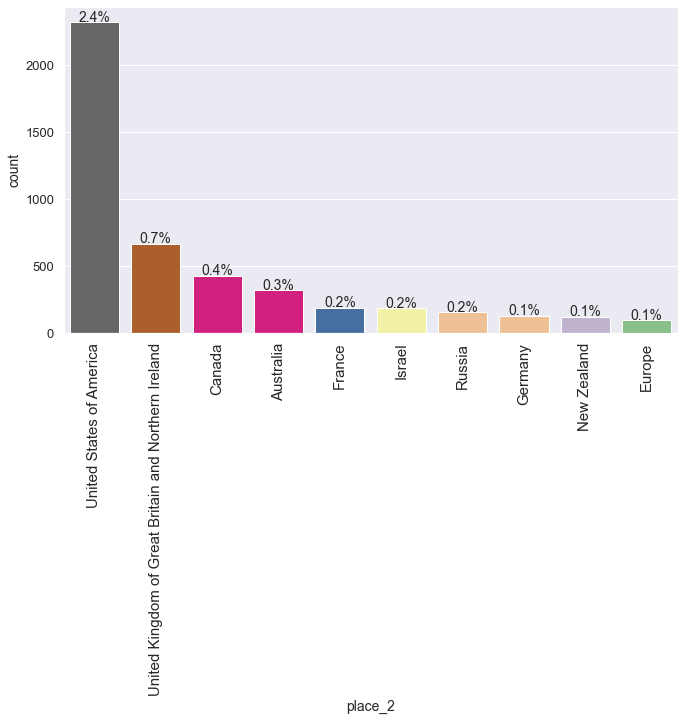

<IPython.core.display.Javascript object>

In [33]:
# Countplot for top 10 place_2 countries
n = 10
order = df["place_2"].value_counts().index[:n]
labeled_countplot(df, "place_2", perc=True, n=n, order=order)

#### Observations:
- Canada, Australia, France, Israel, Russia, Germany, and New Zealand make up the rest of the top 10 `place_2` values.
- The top 10 `place_2` countries account for 5.4% of entries, with most entries not having a `place_2` value.
- Before proceeding, it is time to extract continent for the `place_` columns, to reduce dimensionality of that feature.

### Extracting `region_1` and `region_2` from `place_1` and `place_2`
We will use the defined Map of the World's Continents and Regions from [nationsonline.org](https://www.nationsonline.org/oneworld/small_continents_map.htm#google_vignette), as seen below, to extract `region_` values from `place_` values.  Our `region_` values will include the following:
- North America
- Mid-Cent America/Caribbean (includes Middle and Central America and the Caribbean)
- South America
- Europe (excludes Russian Federation and USSR values)
- Russian Federation
- Africa
- Middle East
- Central Asia
- Asia
- South East Asia
- Oceania (includes Australia)  

We do not have any values for Greenland, so it is excluded from the list.

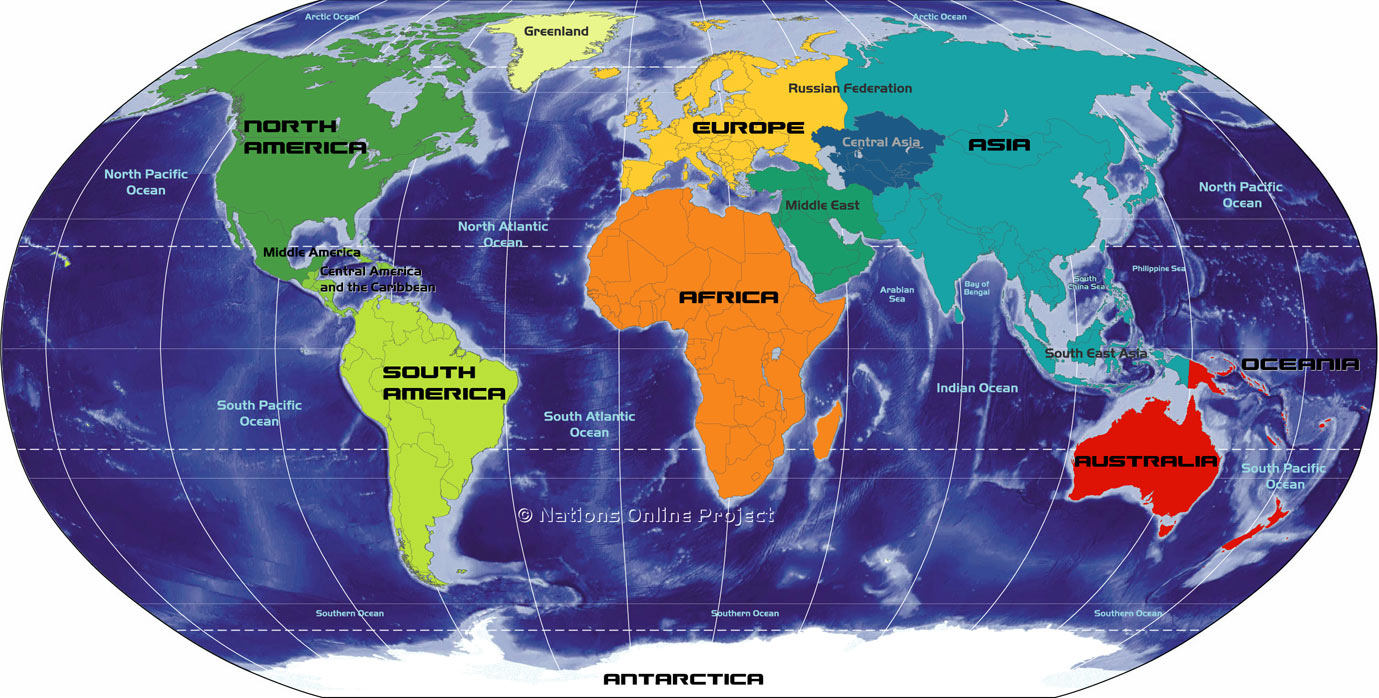

[Countries and Regions of the World from A to Z](https://www.nationsonline.org/oneworld/countries_of_the_world.htm#L)

#### Creating Dictionary of `region_` Keys and `place_` Values

In [34]:
# # Creating list of place_1 values
# place1_list = df["place_1"].value_counts().index.to_list()

<IPython.core.display.Javascript object>

In [35]:
# # Example code to pop entries to add to lists
# place1_list.pop()

<IPython.core.display.Javascript object>

In [36]:
# Re-creating place1_list
place1_list = df["place_1"].value_counts().index.to_list()

# Creating place2_list
place2_list = df["place_2"].value_counts().index.tolist()

# Checking for place_2 values not already in lists generated with place 1 values
[place for place in place2_list if place not in place1_list]

['Middle East', 'North America']

<IPython.core.display.Javascript object>

In [37]:
# Creating lists for each region
north_america = ["Canada", "United States of America", "North America"]

mid_cent_america_carribean = [
    "Martinique",
    "Saint Vincent and the Grenadines",
    "Antigua and Barbuda",
    "Saint Kitts and Nevis",
    "Saint Lucia",
    "Grenada",
    "Belize",
    "The Bahamas",
    "El Salvador",
    "Nicaragua",
    "Panama",
    "Costa Rica",
    "Barbados",
    "Guatemala",
    "Haiti",
    "Honduras",
    "Central America and the Caribbean",
    "Dominican Republic",
    "Trinidad and Tobago",
    "Puerto Rico",
    "Cuba",
    "Jamaica",
    "Mexico",
]

south_america = [
    "Suriname",
    "Paraguay",
    "Bolivia",
    "Guyana",
    "Ecuador",
    "Peru",
    "Uruguay",
    "Venezuela",
    "Colombia",
    "Chile",
    "Argentina",
    "Brazil",
]

europe = [
    "Vatican City State",
    "Gibraltar",
    "Liechtenstein",
    "San Marino",
    "Andorra",
    "Monaco",
    "Luxembourg",
    "Montenegro",
    "Moldova",
    "Europe",
    "Macedonia, Republic of",
    "Malta",
    "Latvia",
    "Iceland",
    "Belarus",
    "Slovakia",
    "Bosnia and Herzegovina",
    "Albania",
    "Lithuania",
    "Slovenia",
    "Estonia",
    "Bulgaria",
    "Portugal",
    "Croatia",
    "Denmark",
    "Finland",
    "Greece",
    "Ukraine",
    "Serbia",
    "Switzerland",
    "Romania",
    "Czech Republic",
    "Wales",
    "Belgium",
    "Hungary",
    "Austria",
    "Sweden",
    "Poland",
    "Netherlands",
    "Norway",
    "Spain",
    "Scotland",
    "Ireland",
    "Italy",
    "Germany",
    "France",
    "United Kingdom of Great Britain and Northern Ireland",
]

russian_federation = ["United Socialist Soviet Republic", "Russia"]

africa = [
    "South Atlantic",
    "Lesotho",
    "São Tomé and Príncipe",
    "Comoros",
    "Djibouti",
    "Seychelles",
    "Guinea Bissau",
    "South Sudan",
    "Eritrea",
    "Equatorial Guinea",
    "Botswana",
    "Swaziland",
    "Burundi",
    "Central African Republic",
    "Chad",
    "Mauritania",
    "Niger",
    "Cabo Verde",
    "Gambia, The",
    "Gabon",
    "Togo",
    "Burkina Faso",
    "Mozambique",
    "Madagascar",
    "Rwanda",
    "Liberia",
    "Mauritius",
    "Benin",
    "Guinea",
    "Sierra Leone",
    "Mali",
    "Libya",
    "Angola",
    "Sudan",
    "Malawi",
    "Ivory Coast",
    "Somalia",
    "Senegal",
    "Ethiopia",
    "Zambia",
    "Tanzania",
    "Namibia",
    "Cameroon",
    "Africa",
    "Tunisia",
    "Uganda",
    "Congo, Republic of the",
    "Morocco",
    "Zimbabwe",
    "Algeria",
    "Kenya",
    "Ghana",
    "Egypt",
    "Nigeria",
    "South Africa",
]

middle_east = [
    "Oman",
    "Qatar",
    "Bahrain",
    "United Arab Emirates",
    "Kuwait",
    "Yemen",
    "Jordan",
    "Saudi Arabia",
    "Cyprus",
    "Palestine",
    "Syria",
    "Armenia",
    "Azerbaijan",
    "Georgia",
    "Georgia",
    "Lebanon",
    "Iraq",
    "Iran",
    "Turkey",
    "Israel",
    "Middle East",
]

central_asia = ["Turkmenistan", "Tajikistan", "Kyrgyzstan", "Uzbekistan", "Kazakhstan"]

asia = [
    "Indian Ocean",
    "Bhutan",
    "Indian subcontinent",
    "Maldives",
    "Mongolia",
    "Asia",
    "North Korea",
    "Afghanistan",
    "Nepal",
    "Armenia",
    "South Korea",
    "Taiwan",
    "Sri Lanka",
    "Bangladesh",
    "Pakistan",
    "China, People's Republic of",
    "Japan",
    "India",
]

south_east_asia = [
    "Brunei",
    "Timor Leste",
    "Cambodia",
    "Singapore",
    "Burma",
    "Vietnam",
    "Thailand",
    "Malaysia",
    "Indonesia",
    "Philippines",
]

oceania = [
    "Tokelau",
    "South Pacific",
    "Kiribati",
    "Palau",
    "Nauru",
    "Vanuatu",
    "Micronesia, Federated States of",
    "Marshall Islands",
    "Laos",
    "Northern Mariana Islands",
    "Tuvalu",
    "Solomon Islands",
    "Tonga",
    "Samoa",
    "Papua New Guinea",
    "Oceania",
    "Fiji",
    "New Zealand",
    "Australia",
]

<IPython.core.display.Javascript object>

In [38]:
# Combining lists into a single dictionary
region_place_dict = {
    "North America": north_america,
    "Mid-Cent America/Caribbean": mid_cent_america_carribean,
    "South America": south_america,
    "Europe": europe,
    "Russian Federation": russian_federation,
    "Africa": africa,
    "Middle East": middle_east,
    "Central Asia": central_asia,
    "Asia": asia,
    "South East Asia": south_east_asia,
    "Oceania": oceania,
}

<IPython.core.display.Javascript object>

#### Obtaining `region_1` from `place_1`

In [39]:
# Initializing region_1 and region_2 columns
df[["region_1", "region_2"]] = None

<IPython.core.display.Javascript object>

In [40]:
%%time

# For loop to obtain region_1 from place_1
for region, places in region_place_dict.items():
    for place in places:
        for index in df[df['region_1'].isna()].index:
            item = df.loc[index, "place_1"]
            if item:
                if item == place:
                    df.loc[index, "region_1"] = region

# Checking a sample of rows
df.sample(2)

CPU times: total: 56.3 s
Wall time: 56.3 s


,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,recip_num_references,region_1,region_2
79428,", 80, Bosnian sevdalinka singer.",https://en.wikipedia.org/wiki/Beba_Selimovi%C4%87,6,2020,March,None,80.000,None,Bosnia and Herzegovina,NaN,0,0,0,0,0,1,0,0,0,0,0,1,0.167,Europe,None
85370,", 78, Australian political journalist and commentator.",https://en.wikipedia.org/wiki/Mungo_Wentworth_MacCallum,8,2020,December,None,78.000,None,Australia,NaN,0,0,0,0,0,1,0,0,1,0,0,2,0.125,Oceania,None


<IPython.core.display.Javascript object>

#### Obtaining `region_2` from `place_2`

In [41]:
%%time

# For loop to obtain region_2 from place_2
for region, places in region_place_dict.items():
    for place in places:
        for index in df[(df['region_2'].isna()) & (df['place_2'].notna())].index:
            item = df.loc[index, "place_2"]
            if item:
                if item == place:
                    df.loc[index, "region_2"] = region

# Checking a sample of rows
df[df['region_2'].notna()].sample(2)

CPU times: total: 3.86 s
Wall time: 3.86 s


,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,recip_num_references,region_1,region_2
73540,", 83, Australian Greek Orthodox prelate, Archbishop of Australia .",https://en.wikipedia.org/wiki/Archbishop_Stylianos_of_Australia,5,2019,March,since 1975,83.000,None,Australia,Greece,0,0,1,0,0,0,0,0,0,0,0,1,0.200,Oceania,Europe
45212,", 84, Austrian-born German actor.",https://en.wikipedia.org/wiki/Hans_von_Borsody,3,2013,November,None,84.000,None,Austria,Germany,0,0,0,0,0,1,0,0,0,0,0,1,0.333,Europe,Europe


<IPython.core.display.Javascript object>

#### Verifying All `region_` Values Captured

In [42]:
# Verifying all regions captured
print(
    f'There are {len(df[(df["place_1"].notna()) & (df["region_1"].isna())])} entries that contain place_1 and not region_1.\n'
)

print(
    f'There are {len(df[(df["place_2"].notna()) & (df["region_2"].isna())])} entries that contain place_2 and not region_2.'
)


There are 0 entries that contain place_1 and not region_1.

There are 0 entries that contain place_2 and not region_2.


<IPython.core.display.Javascript object>

#### Observations:
- We have captured all of the `region_` values.
- Before visualizing them, we will treat `region_2`.

### Treatment of `region_2`
`region_2` is a trickier feature to interpret than `region_1`, as fewer than 6,000 entries have this value, indicative of a relocation.  Also, some of the `place_2` values from which it was derived are merely duplicates of their `place_1` values (e.g. "New Zealand Maori" results in duplicate New Zealand `place_` values), so their presence does not represent a location change.

The most straightforward treatment of `region_2` is to replace missing values with the `region_1` value.  So, all entries without a relocation will have matching `region_1` and `region_2` values and we don't have to be concerned with identifying and treating duplicate `place_` values.  An alternate approach would be to create a new category of "None" for entries missing `region_2`.  Although that approach would capture whether relocation took place, it would lose the essence of the feature which is where the individual lived.  All individuals live somewhere at all times, so a value of "None" does not compare appropriately to a value of "Europe" or "Middle East".  We will proceed with the former approach which indicates region of residence.

We will lose some nuance if we treat `region_2` directly, so we will add a new column, `region_2_treated`, that will allow us to retain the original column, if we should want it.

#### Creating `region_2_treated`

In [43]:
# Creating new column region_2_treated from region_2
df["region_2_treated"] = df["region_2"]

# Checking a sample
df.sample()

,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,recip_num_references,region_1,region_2,region_2_treated
23944,", 68, American Representative from Ohio since 1989.",https://en.wikipedia.org/wiki/Paul_Gillmor,7,2007,September,None,68.000,None,United States of America,NaN,0,0,0,0,0,0,0,0,1,0,0,1,0.143,North America,None,None


<IPython.core.display.Javascript object>

In [44]:
# Replacing missing values in region_2_treated with region_1 values
df["region_2_treated"].fillna(df["region_1"], inplace=True)

# Checking a sample of treated rows
df[df["region_2"].isna()].sample(2)

,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,recip_num_references,region_1,region_2,region_2_treated
80576,", 86, American professional wrestling referee , COVID-19.",https://en.wikipedia.org/wiki/Jack_Lotz,3,2020,April,"WWF and stuntman ,",86.000,COVID,United States of America,NaN,0,0,0,0,0,1,1,0,0,0,0,2,0.333,North America,None,North America
16780,", 89, English test pilot for the de Havilland company.",https://en.wikipedia.org/wiki/Pat_Fillingham,3,2003,July,None,89.000,None,United Kingdom of Great Britain and Northern Ireland,NaN,0,0,0,0,0,0,0,1,0,0,0,1,0.333,Europe,None,Europe


<IPython.core.display.Javascript object>

### `region_1`

Unique values: 11


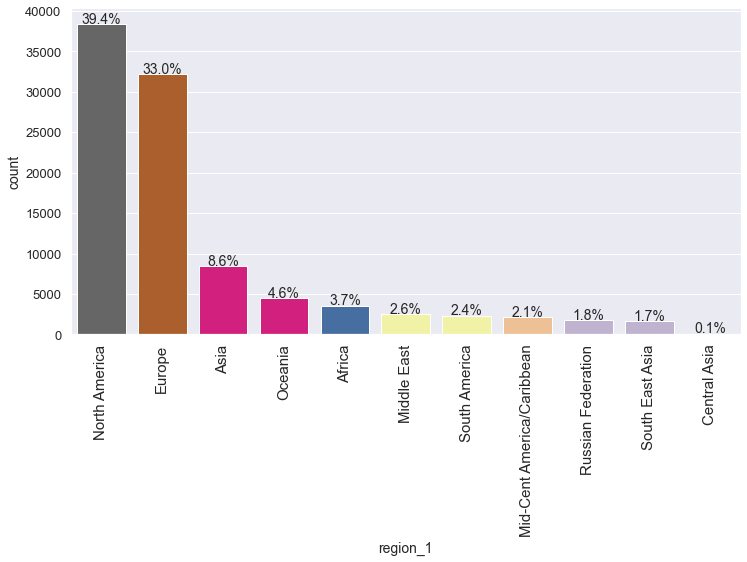

<IPython.core.display.Javascript object>

In [45]:
# Countplot and number of unique values for region_1
print(f"Unique values: {df['region_1'].nunique()}")
order = df["region_1"].value_counts().index
labeled_countplot(df, "region_1", perc=True, order=order)

### `region_2_treated`

Unique values: 11


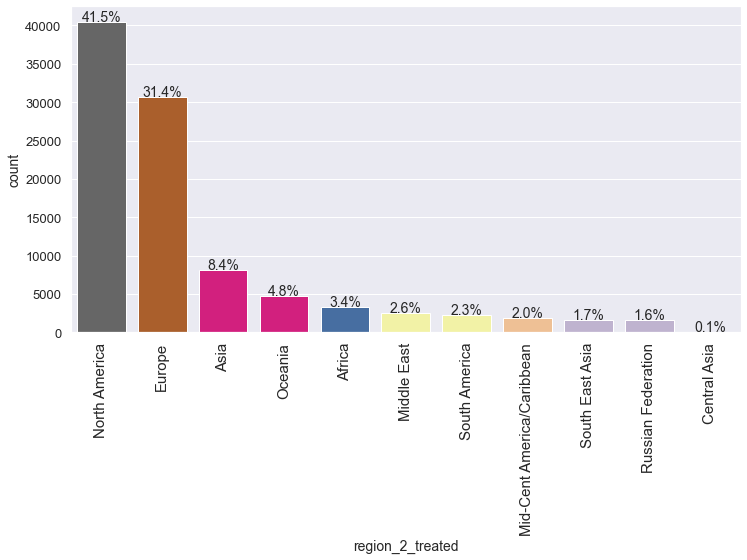

<IPython.core.display.Javascript object>

In [46]:
# Countplot and number of unique values for region_2_treated
print(f"Unique values: {df['region_2_treated'].nunique()}")
order = df["region_2_treated"].value_counts().index
labeled_countplot(df, "region_2_treated", perc=True, order=order)

#### Observations:
- The two count plots above provide a "before and after" comparison across values for `region`.
- All regions had slight net decreases, except North America and Oceania which gained entries, and Middle East and South East Asia, which stayed level.
- It makes sense that individuals would be more noted in their permanent location, which, in the case of this dataset, corresponds to English-speaking contributors.  Europe appears to be an exception, but there are other Wikipedia sites for other languages, including within Europe.  The majority of the net decrease in Europe is likely reflected in the increase in North American values.

### `num_categories`

Unique values: 5


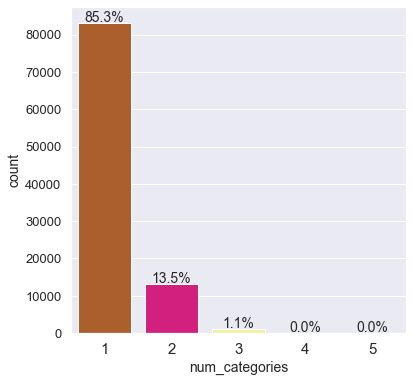

<IPython.core.display.Javascript object>

In [47]:
# Countplot and number of unique values for num_categories
print(f"Unique values: {df['num_categories'].nunique()}")
order = df["num_categories"].value_counts().index
labeled_countplot(df, "num_categories", perc=True, order=order, rotation=0)

#### Observations:
- Here, we revisit `num_categories` and see that the vast majority of entries have only 1 `known for` category.
- We will combine the category column and num_references column information into a single category, `known_for`.

### `known_for`
To visualize the `known for` categories, we will create a new column, `known_for`, with values consistent with each category (i.e., `arts`, `politics_govt_law`, etc.), plus the following additional levels:  

    - two (entries with 2 categories)
    - three_to_five (entries with 3, 4, or 5 categories)
The original category names will refer to entries with the sole respective category (i.e., entries with 1 category). The new levels will refer to entries that have the defined `num_references`.

In [48]:
# Initializing known_for column
df["known_for"] = None

<IPython.core.display.Javascript object>

In [49]:
# Creating known_for column

# Assigning new levels for entries with multiple categories
df.loc[df[df["num_categories"] == 2].index, "known_for"] = "two"
df.loc[df[df["num_categories"] == 3].index, "known_for"] = "three_to_five"
df.loc[df[df["num_categories"] == 4].index, "known_for"] = "three_to_five"
df.loc[df[df["num_categories"] == 5].index, "known_for"] = "three_to_five"

# For loop to assign known_for values for single-category entries
category_list = df.columns[10:21].tolist()
for category in category_list:
    for index in df[(df[category] == 1) & (df["num_categories"] == 1)].index:
        df.loc[index, "known_for"] = str(category)

# Checking a sample of rows
df.sample(2)

,info,link,num_references,year,month,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,recip_num_references,region_1,region_2,region_2_treated,known_for
55042,", 82, British historian.",https://en.wikipedia.org/wiki/John_Bossy,11,2015,October,None,82.000,None,United Kingdom of Great Britain and Northern Ireland,NaN,0,0,0,1,0,0,0,0,0,0,0,1,0.091,Europe,None,Europe,academia_humanities
78736,", 103, American actor .",https://en.wikipedia.org/wiki/Kirk_Douglas,183,2020,February,"Honorary Oscar, 1996, , winner",103.000,None,United States of America,NaN,0,0,0,0,0,1,0,0,0,0,0,1,0.005,North America,None,North America,arts


<IPython.core.display.Javascript object>

### `known_for`

Unique values: 13


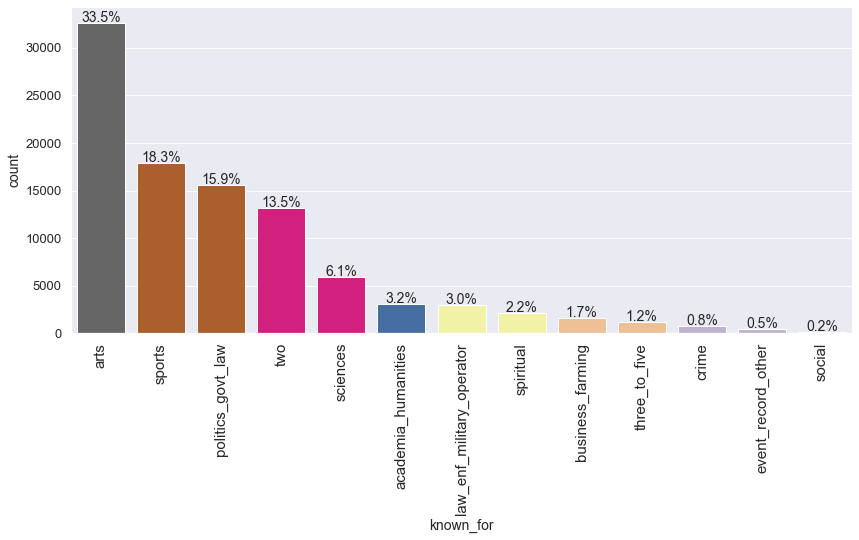

<IPython.core.display.Javascript object>

In [50]:
# Countplot and number of unique values for known_for
print(f"Unique values: {df['known_for'].nunique()}")
order = df["known_for"].value_counts().index
labeled_countplot(df, "known_for", perc=True, order=order)

#### Observations:
- The category arts accounts for just over 1/3 of entries, followed by sports, then politics_govt_law, which combined also account for just over 1/3 of entries.
- Having the sole category of social is most rare, at 0.2%, followed by event_record_other (0.5%), then crime (0.8%).
- Let us examine the entries with 2 categories more closely.

#### `known for` Categories for Entries with 2 Categories

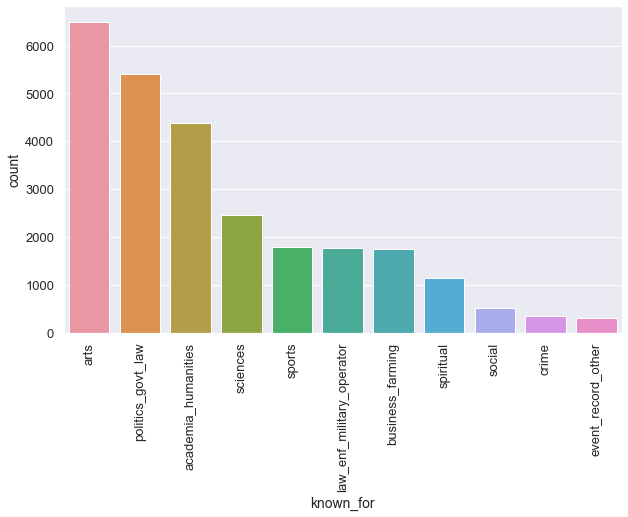

<IPython.core.display.Javascript object>

In [51]:
# Creating dataframe of categories with counts for entries with 2 categories
data = pd.DataFrame(
    df[df["num_categories"] == 2][category_list].sum(), columns=["count"],
).sort_values("count", ascending=False)
data.reset_index(inplace=True,)
data.rename(columns={"index": "known_for"}, inplace=True)

# Barplot of category and count
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x="known_for", y="count")
plt.xticks(rotation=90)
plt.show()

#### Observations:
- The combined count in this plot is double as each entry is represented in two of the categories.
- We can see that arts and politics_govt_law are similarly at or toward the top values, but academia_humanities and sciences have moved up toward the top.
- This difference indicates that academia_humanities and sciences have relative higher likelihoods of occurring in combination with another category.  We would anticipate a high number of individuals with with the science category to also be categorized in academia_humanties, as professors in their respective fields, etc.

### Bivariate and Multivariate Analysis

#### Function to plot boxplots with and without outliers

In [52]:
# Define a function to plot boxplots for x categorical feature and y numeric feature with and without outliers
def box_w_wo_fliers(data, x_feature, y_feature, order=None, height=10):
    """
    Plots side by side boxplots, with and without outliers
    
    data = dataframe
    x_feature = categorical feature
    y_feature = numeric feature
    order = order to plot the categorical feature (default is None)
    height = figure height (default is 10)
    """
    fig, axs = plt.subplots(1, 2, figsize=(15, height))

    # Boxplot with outliers
    sns.boxplot(
        data=data,
        x=x_feature,
        y=y_feature,
        ax=axs[0],
        palette="CMRmap",
        order=order,
        medianprops={"color": "teal", "linewidth": 2},
    )

    # Boxplot without outliers
    sns.boxplot(
        data=data,
        x=x_feature,
        y=y_feature,
        ax=axs[1],
        showfliers=False,
        palette="CMRmap",
        order=order,
        showmeans=True,
        medianprops={"color": "teal", "linewidth": 2},
        meanprops={
            "marker": "o",
            "markersize": 9,
            "markeredgecolor": "black",
            "markerfacecolor": "yellowgreen",
        },
    )

    axs[0].set_title("With Outliers")
    axs[1].set_title("Without Outliers")
    axs[0].tick_params(labelrotation=90)
    axs[1].tick_params(labelrotation=90)

    plt.tight_layout()
    plt.show()

<IPython.core.display.Javascript object>

### Correlation of Numerical Features w.r.t. `known_for`

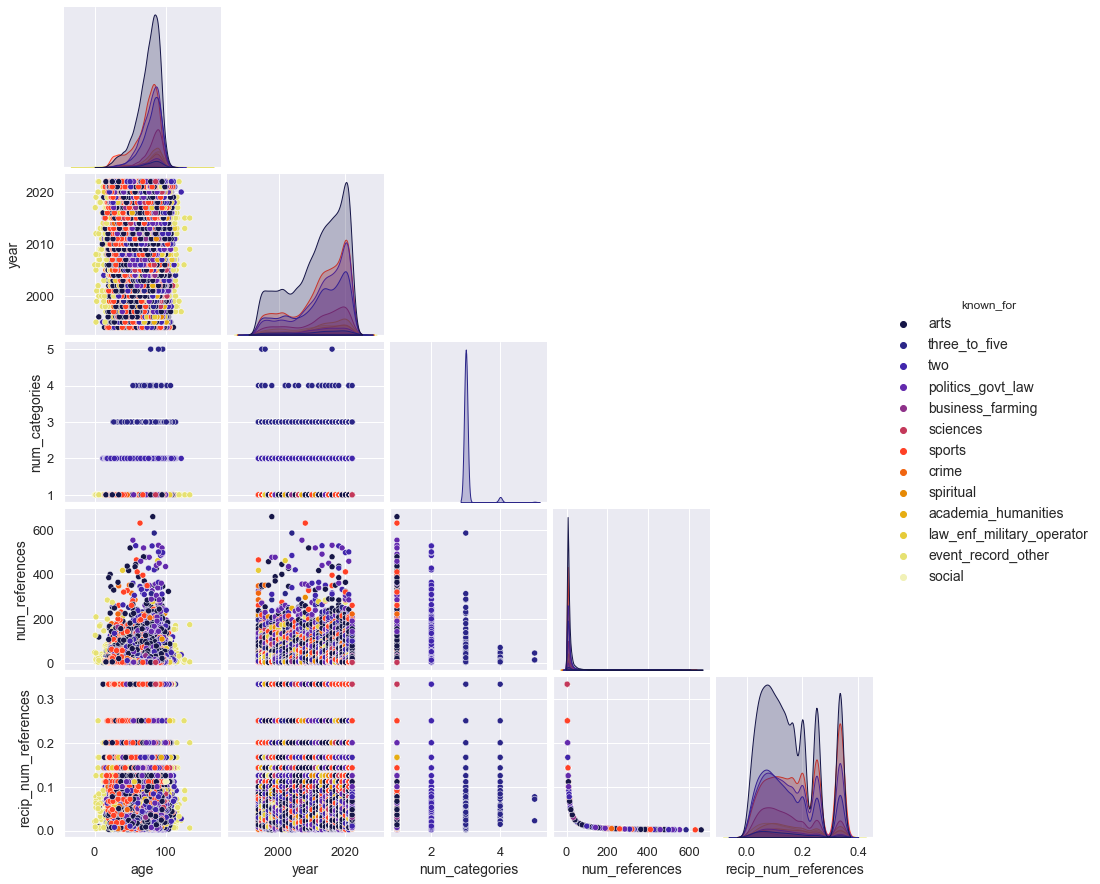

<IPython.core.display.Javascript object>

In [53]:
# Pairplot of numerical features
vars = ["age", "year", "num_categories", "num_references", "recip_num_references"]
sns.pairplot(
    df, diag_kind="kde", corner=True, vars=vars, hue="known_for", palette="CMRmap"
)
plt.show()

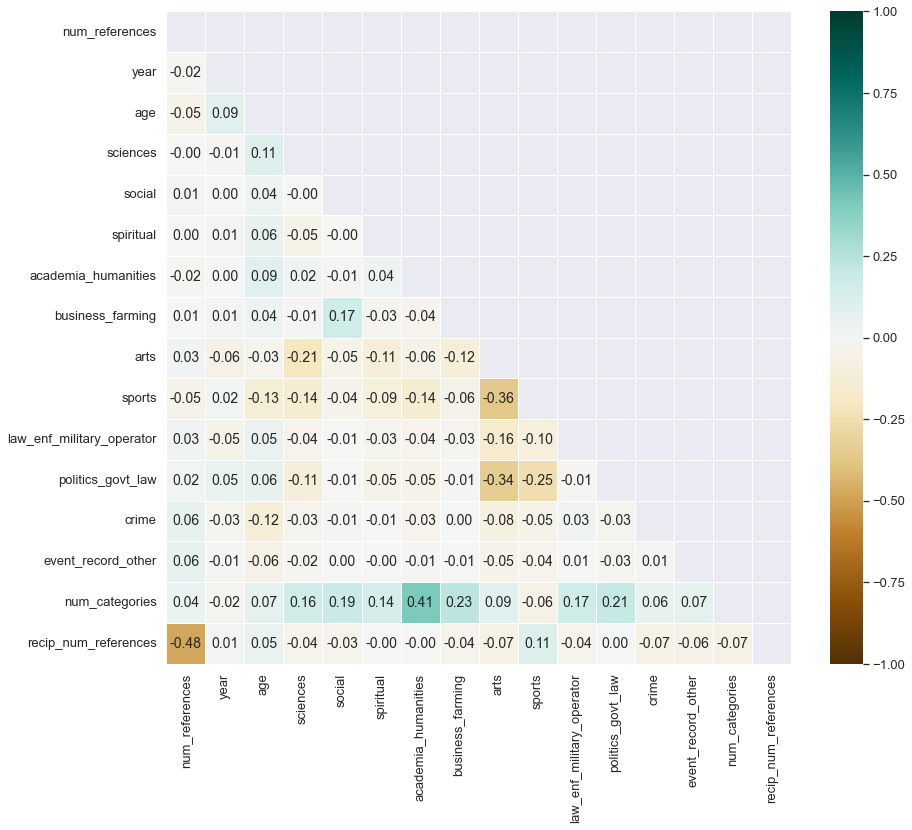

<IPython.core.display.Javascript object>

In [69]:
# Heatmap of correlation of numerical features
plt.figure(figsize=(14, 12))
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(
    data=corr,
    annot=True,
    vmin=-1,
    vmax=1,
    linewidth=1,
    fmt=".2f",
    annot_kws={"size": 14},
    cmap="BrBG",
    mask=mask,
)
plt.show()

#### Observations:
- We can see entries in the `event_record_other` category bookending `age` in the pairplot, which makes sense as the category contains supercentarians as well as infants, known specifically for their age or circumstances.
- There is also discernable, albeit subtle, shape difference between the `known_for` categories on the kernel density estimate for `age` and `recip_num_references`, which may indicate a relationship between these features.
- As expected, the heatmap indicates, `num_references` to be moderately negatively correlated with its reciprocal, `recip_num_references`.
- Also, as we had anticipated, `academia_humanities`, is moderately positively correlated with `num_categories`.
- Other noteworthy moderate negative correlations are between `arts` and `sports` or `politics_govt_law`.  These two `known_for` categories are less likely to occur in combination, than some of the other categories.
- `business_farming` and `social` are mildly positively correlated, which is consistent with successful people in business participating in philanthropy.
- We do not have any highly correlated numerical features.

### `known_for` vs `num_references` 

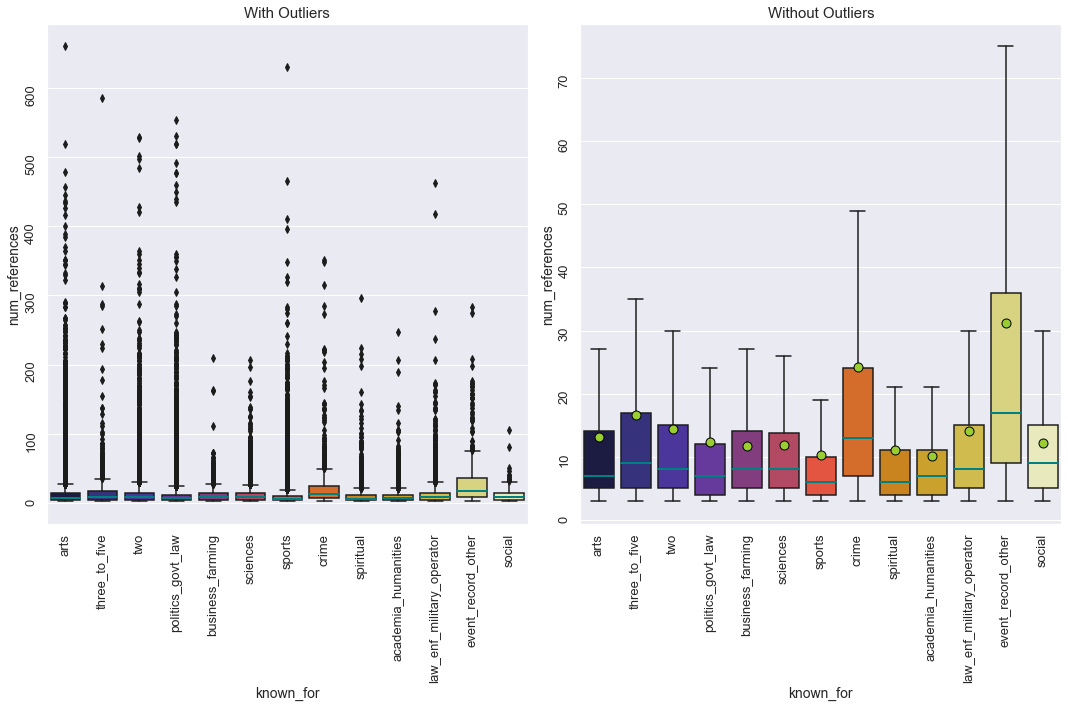

<IPython.core.display.Javascript object>

In [55]:
# Plotting boxplots of known_for vs num_references with and without outliers
box_w_wo_fliers(df, "known_for", "num_references")

#### Observations:
- Here we see clearly the impact of leaving `num_references` untreated as any difference between `known_for` categories is dwarfed by the upper-end outliers.
- `event_record_other` entries have the highest mean and median `num_references`, followed by entries categorized in `crime`.  This finding likely reflects higher participation by Wikipedia contributors for these individuals, who made broader news as exceptions, such as participating in criminal activity or being the victim of it, or some other newsworthy characteristic.
- Entries in the `sports` category have the lowest mean and median `num_references`, followed by those in the `spiritual` category.
- In combination, the features may have predictive value for modeling.

### `known_for` vs `age` (target)

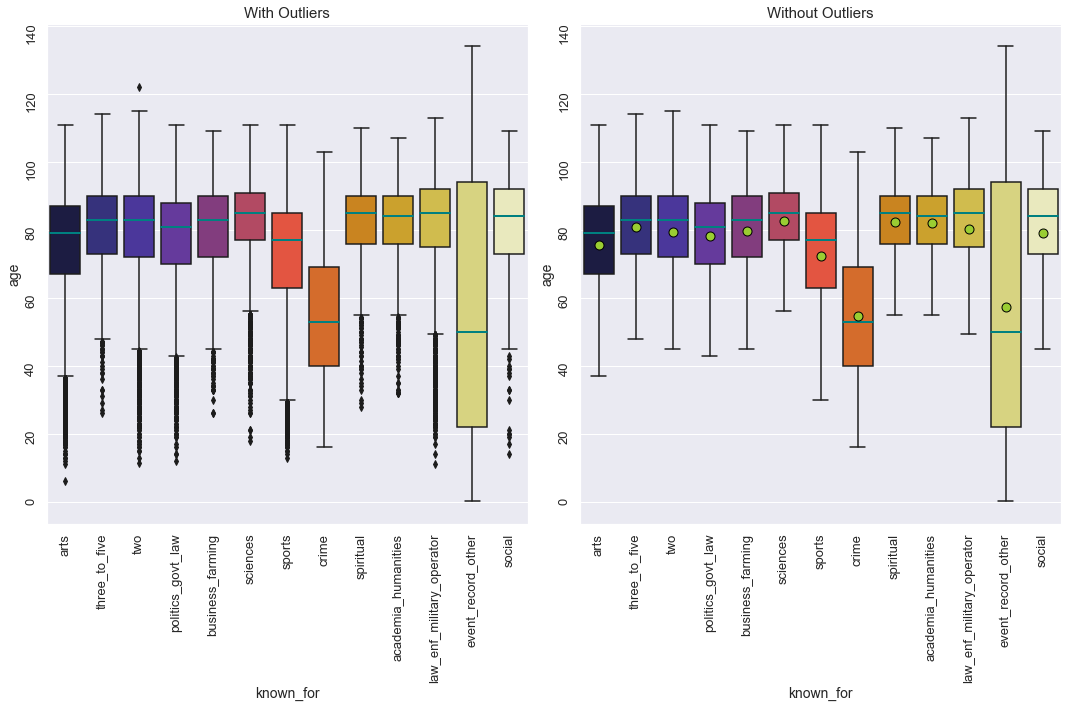

<IPython.core.display.Javascript object>

In [56]:
# Plotting boxplots of known_for vs age with and without outliers
box_w_wo_fliers(df, "known_for", "age")

#### Observations:
- As we anticipated, event_record_other entries have the widest spread of the `known_for` categories, for `age`.  By definition, they are exceptional values.
- Entries in the crime category have the lowest mean and median `age` (\~53 and \~55 years), followed by those in sports (\~72 and \~75 years), then arts (\~76 and \~79 years).
- The remaining categories have similar distributions for `age`, with science and spiritual having top mean and median `age`, of \~85 and \~87 years, respectively.
- The observable variation in `age` between `known_for` categories indicates that `known_for` may have some predictive value for modeling.

### `region_1` vs `num_references` 

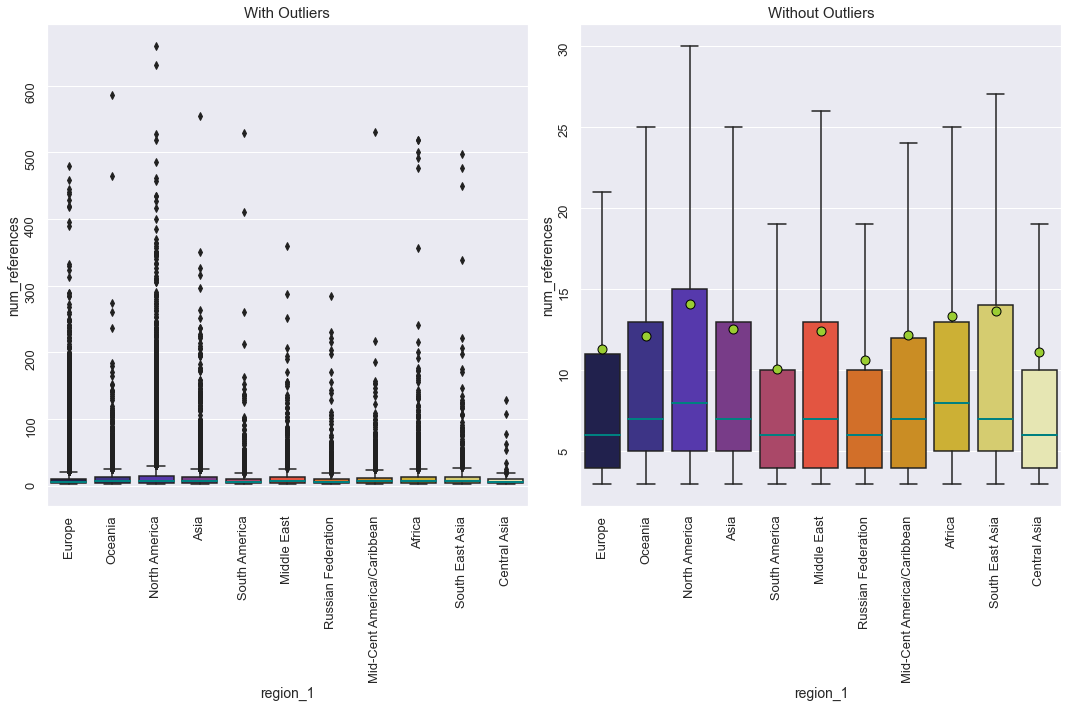

<IPython.core.display.Javascript object>

In [57]:
# Plotting boxplots of region_1 vs num_references with and without outliers
box_w_wo_fliers(df, "region_1", "num_references")

#### Observations:
- Again we see the impact of outliers on `num_references` vs `region_1`.
- Median values are similar across the regions, while mean values show more variation (consistent with the upper-end ouliers).  
- North America has the widest spread, which is not surprising, as it also has the most entries.
- We do not expect the combination of these features to have strong predictive value for modeling.

### `region_1` vs `age` (target)

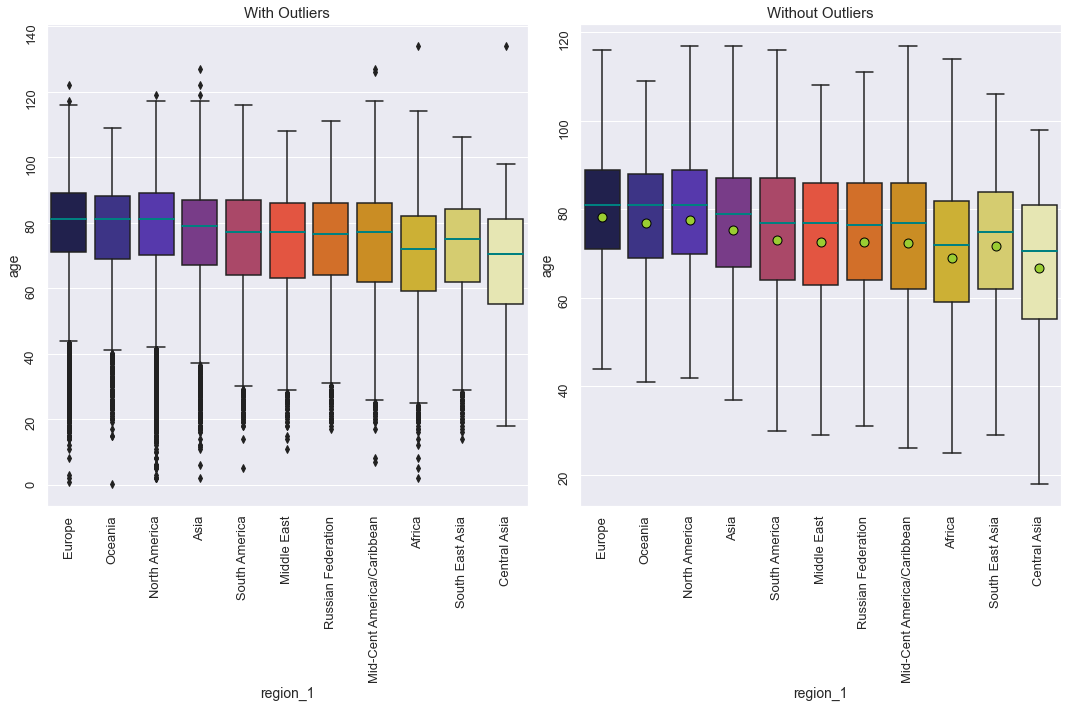

<IPython.core.display.Javascript object>

In [58]:
# Plotting boxplots of region_1 vs age with and without outliers
box_w_wo_fliers(df, "region_1", "age")

#### Observations:
- Central Asia and Africa have the lowest mean and median `age`, at ~70 and ~72 respectively.
- Excluding outliers, Mid-Cent America/Caribbean has the widest spread for `age`.
- The remaining regions are similar, with Europe, Oceania, and North America having slightly higher mean and median `age` of ~78 and ~81 years, respectively.
- `region_1` is not likely to have strong predictive value for modeling.

### `region_2_treated` vs `num_references`

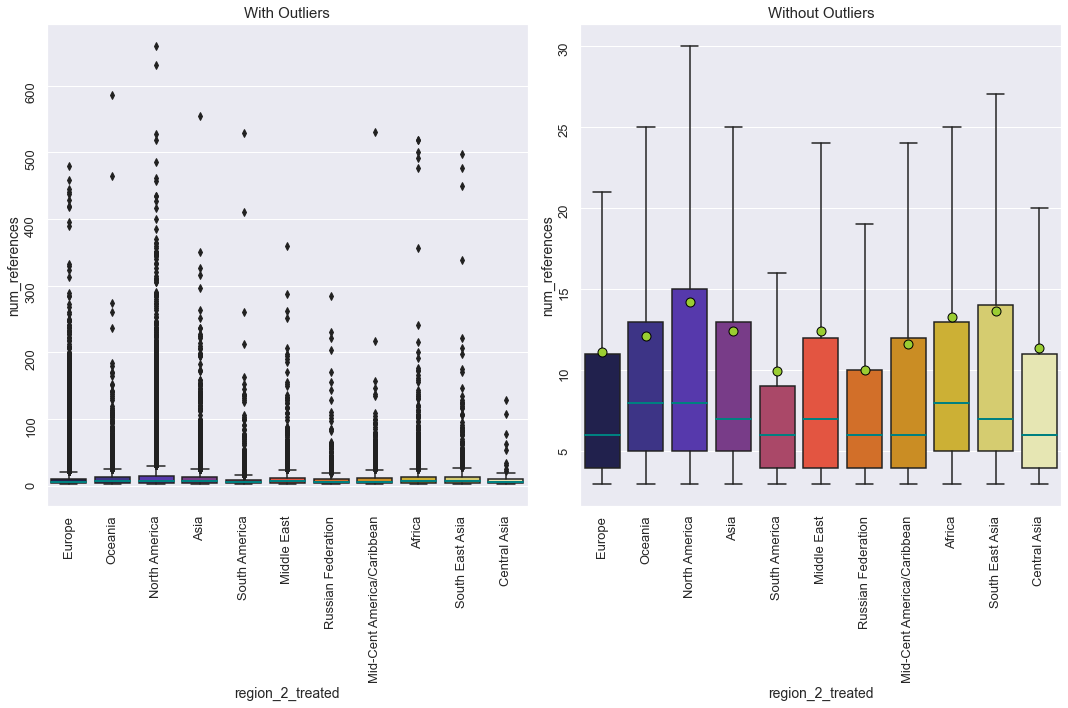

<IPython.core.display.Javascript object>

In [59]:
# Plotting boxplots of region_2 vs num_references with and without outliers
box_w_wo_fliers(df, "region_2_treated", "num_references")

#### Observations:
- The distributions for `num_references` between `region_2_treated` levels is comparable to the same for `region_1` levels.
- The spread for South America does appear narrower.
- In combination, the two features may offer some predictive value to modeling, but their contribution is not anticipated to be strong.

### `region_2_treated` vs `age` (target)

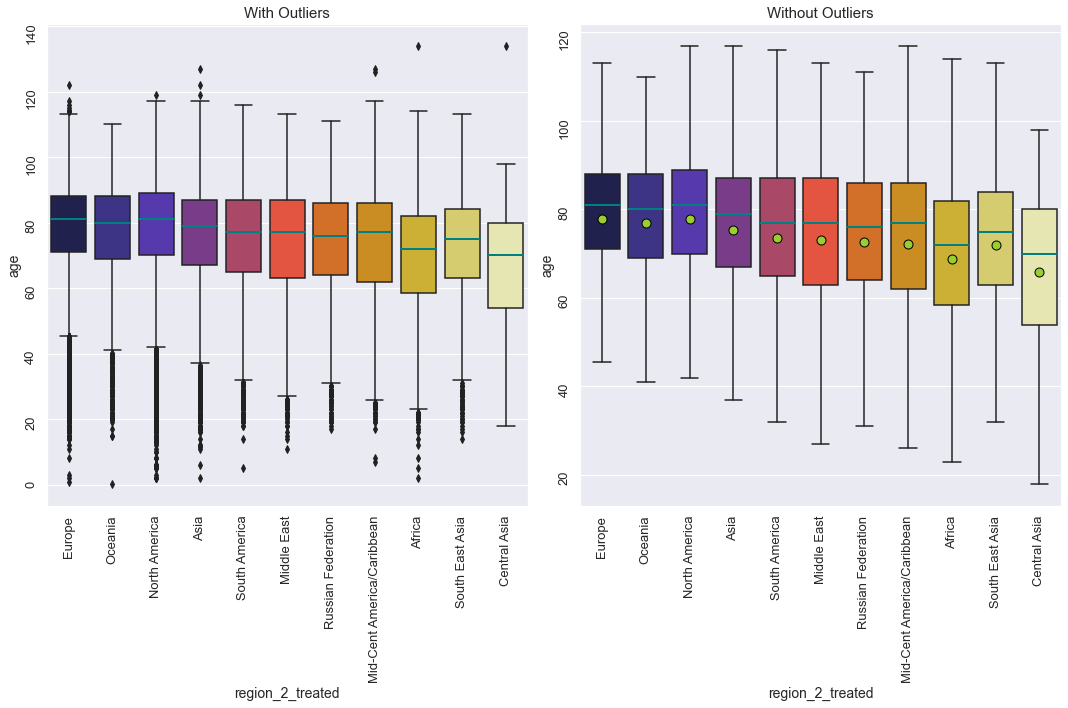

<IPython.core.display.Javascript object>

In [60]:
# Plotting boxplots of region_2_treated vs age with and without outliers
box_w_wo_fliers(df, "region_2_treated", "age")

#### Observations:
- `region_2_treated` vs `age` is comparable to `region_1` vs `age`.
- The feature is not likely to be a strong predictor.

### `year` vs `age` (target)

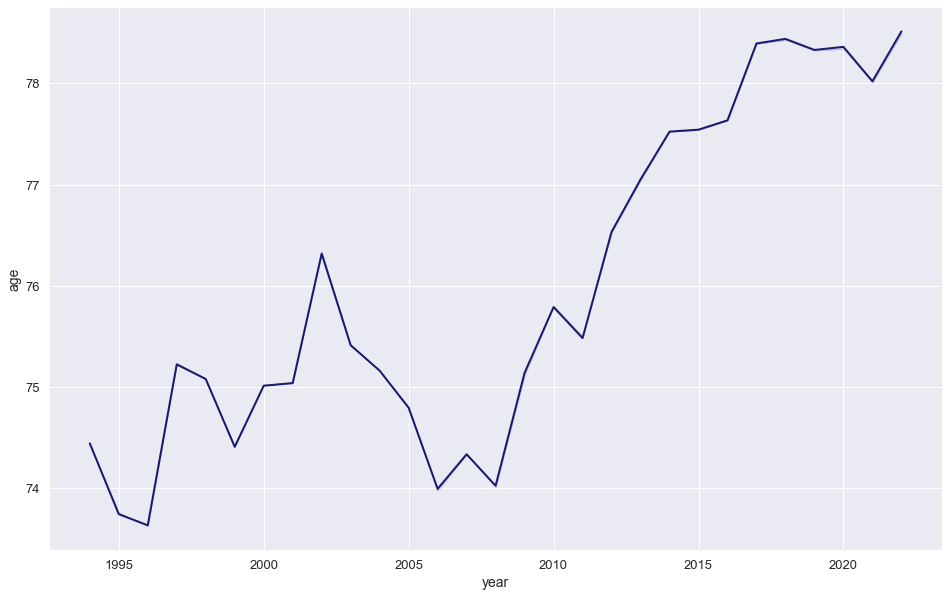

<IPython.core.display.Javascript object>

In [61]:
# Line plot of year vs age
plt.figure(figsize=(16, 10))
sns.lineplot(data=df, x="year", y="age", ci=False, linewidth=2)
plt.show()

#### Observations:
- There is an overall upward trend in mean `age` with a peak at 2002 and subsequent dip to 2006-2008.
- The trend is likely consistent with increasing life expectancy for the bulk of this period.
- We anticipate `year` to have some predictive value.

### `year` vs `age` (target) w.r.t. `known_for`

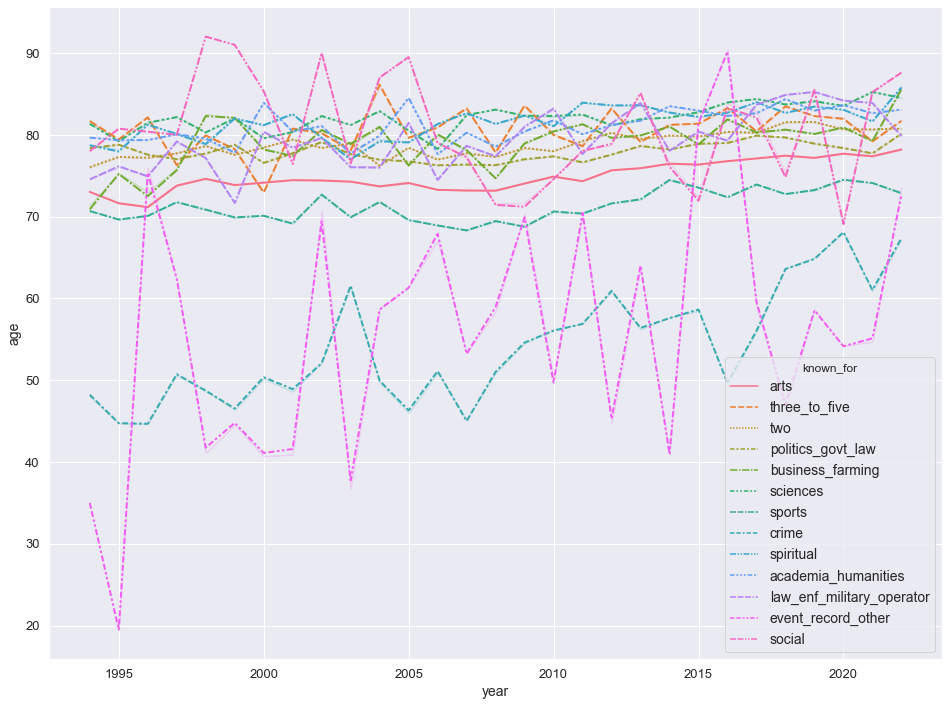

<IPython.core.display.Javascript object>

In [62]:
# Line plot of year vs age w.r.t known_for
plt.figure(figsize=(16, 12))
sns.lineplot(
    data=df,
    x="year",
    y="age",
    ci=False,
    hue="known_for",
    style="known_for",
    linewidth=2,
)
plt.show()

#### Observations:
- With the exception of social, `age` trends upward across `known_for` levels.
- The separation in the categories is clear, particularly with the highly variable mean `age` for event_record_other, crime, sports, and arts, which have the lower mean values for `age`.
- We anticipate both features to have predictive value, that is amplified in combination.

### `year` vs `age` (target) w.r.t. `region_1`

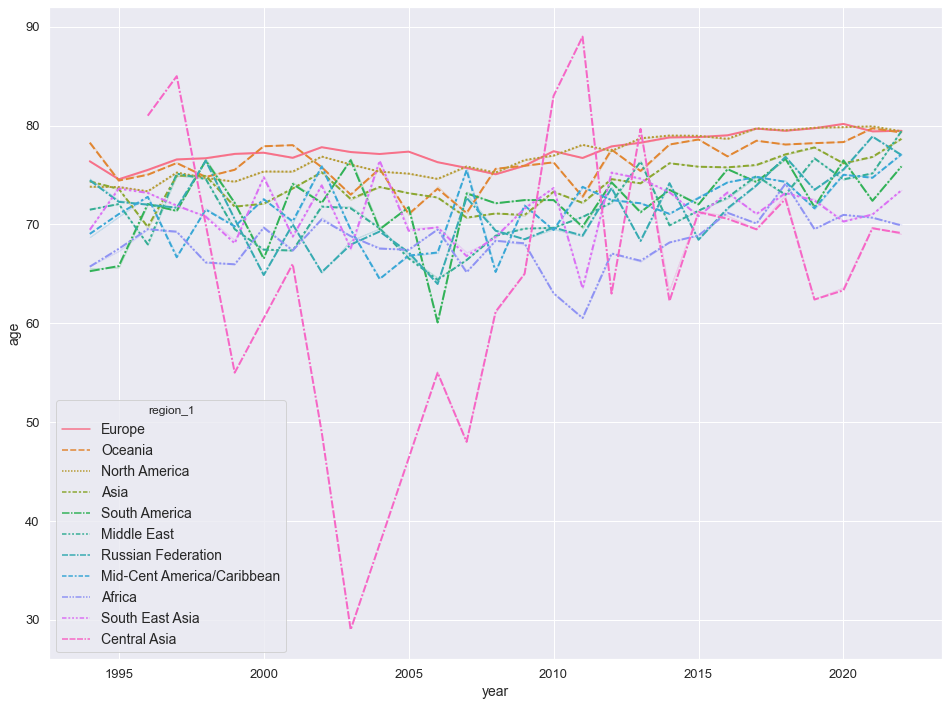

<IPython.core.display.Javascript object>

In [63]:
# Line plot of year vs age w.r.t region_1
plt.figure(figsize=(16, 12))
sns.lineplot(
    data=df, x="year", y="age", ci=False, hue="region_1", style="region_1", linewidth=2,
)
plt.show()

#### Observations:
- The slight overall upward trend is less obvious here due to the extreme mean `age` values for Central Asian entries, but it is still visible.  We will keep in mind that the difference is only for a few years.
- Again, `region_` appears less valuable for prediction than `known_for`.
- We expect `region_2_treated` vs `age` to look very similar to `region_1` vs `age` as the two `region` features share so many values, but we will view it, regardless.
- In combination with `age`, `region_1` is likely to have more predictive value than on its own.

### `year` vs `age` (target) w.r.t. `region_2_treated`

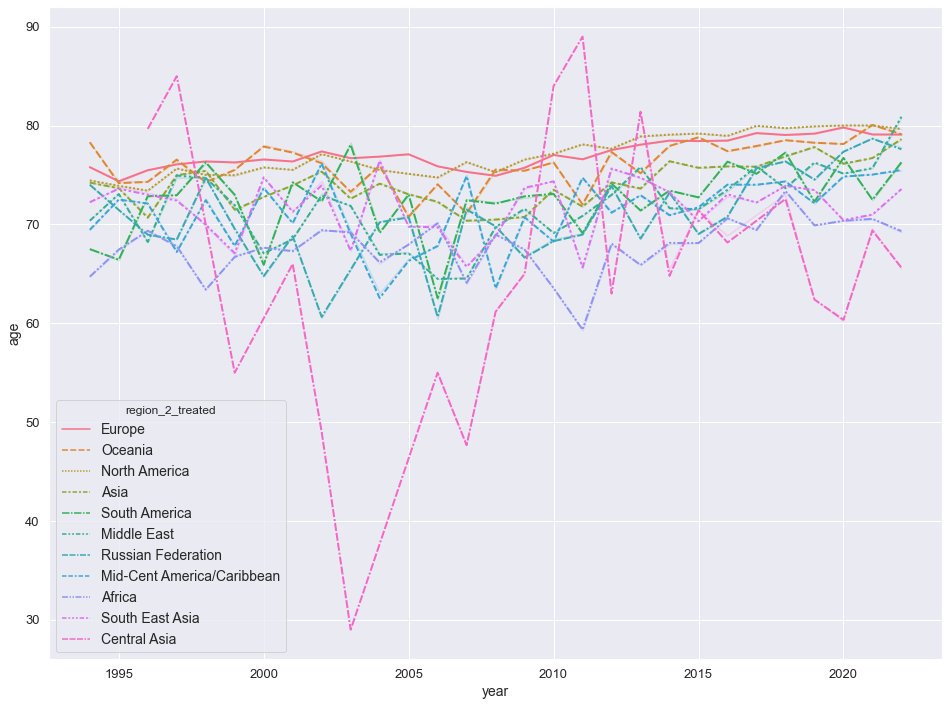

<IPython.core.display.Javascript object>

In [64]:
# Line plot of year vs age w.r.t region_2_treated
plt.figure(figsize=(16, 12))
sns.lineplot(
    data=df,
    x="year",
    y="age",
    ci=False,
    hue="region_2_treated",
    style="region_2_treated",
    linewidth=2,
)
plt.show()

#### Observations:
- Indeed, the two `region_` vs `age` plots look nearly identical.

### `month` vs `age` (target)

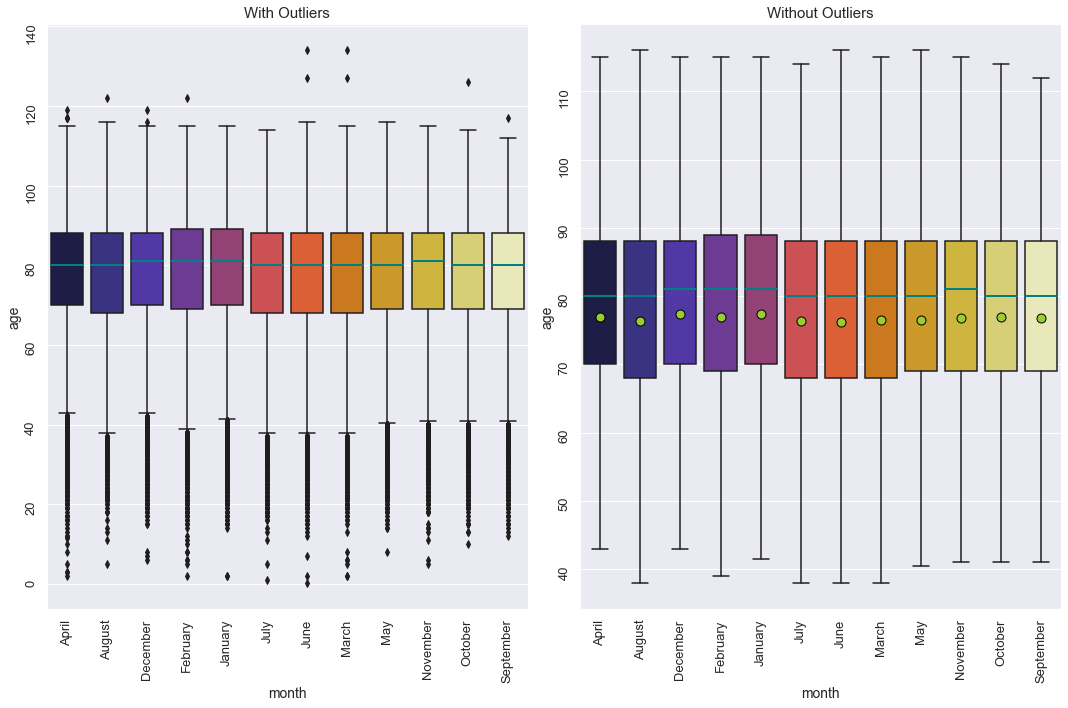

<IPython.core.display.Javascript object>

In [65]:
# Plotting boxplots of region_2 vs age with and without outliers
box_w_wo_fliers(df, "month", "age")

#### Observations:
- Plotted entirely as a sanity check, as expected, `month` of death appears to have no bearing on `age`.
- We can proceed to drop this feature.

#### Dropping `month`

In [66]:
# Dropping month column
df.drop("month", axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [67]:
df.sample()

,info,link,num_references,year,info_parenth,age,cause_of_death,place_1,place_2,sciences,social,spiritual,academia_humanities,business_farming,arts,sports,law_enf_military_operator,politics_govt_law,crime,event_record_other,num_categories,recip_num_references,region_1,region_2,region_2_treated,known_for
37206,", 86, Italian politician.",https://en.wikipedia.org/wiki/Guido_Fanti,4,2012,None,86.000,None,Italy,NaN,0,0,0,0,0,0,0,0,1,0,0,1,0.250,Europe,None,Europe,politics_govt_law


<IPython.core.display.Javascript object>

## Summary of EDA

#### Data Description:
-  


#### Data Handling and Cleaning:
- 


#### Observations from EDA:  

Univariate
- 

Bivariate and Multivariate
-  Correlation: Numerical features are mostly independent of each other, with a few exceptions:       
    - Moderate Positive Correlations:
        - 
    - Moderate Negative Correlations:
        - 
        
#### Actions for Data Pre-processing:
- Only numerical features will be used for clustering.
- We will perform outlier detection, but not treat outliers prior to clustering, which may itself detect the outliers.
- Standardization is needed for all numerical columns.

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97549 entries, 0 to 97548
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype   
---  ------                     --------------  -----   
 0   info                       97549 non-null  object  
 1   link                       97549 non-null  object  
 2   num_references             97549 non-null  int64   
 3   year                       97549 non-null  int64   
 4   info_parenth               36536 non-null  object  
 5   age                        97549 non-null  float64 
 6   cause_of_death             33179 non-null  object  
 7   place_1                    97406 non-null  category
 8   place_2                    5843 non-null   category
 9   sciences                   97549 non-null  int64   
 10  social                     97549 non-null  int64   
 11  spiritual                  97549 non-null  int64   
 12  academia_humanities        97549 non-null  int64   
 13  business_farming           9754

<IPython.core.display.Javascript object>

In [ ]:
print("dunzo!")

# Sound notification when cell executes
chime.success()

#### Observations:
- We will now save our dataset and pick back up in a new notebook.

### Exporting Dataset to SQLite Database [wp_life_expect_clean.db]()

In [ ]:
# # Exporting dataframe

# # Saving dataset in a SQLite database
# conn = sql.connect("wp_life_expect_clean.db")
# df.to_sql("wp_life_expect_clean", conn, index=False)

In [ ]:
print('Complete')

# Chime notification when cell executes
chime.success()

# [Proceed to Data Cleaning Part ]()